#### 2. SmartSeq\MCF7_SmartS_Unfiltered_Data.txt


Now, similarely to the previous dataset, we proceed to the analysis of MCF7 Dataset.

We will analyze this second unfiltered data applying techniques and methods already explained in the first analysis.

In [6]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
#import torch as th
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import kstest
from scipy.stats import poisson
from scipy.stats import chisquare
from scipy.stats import nbinom
from scipy.stats import gamma
from scipy.stats import chi2_contingency
import scipy.stats as stats
import random
from scipy.stats import mannwhitneyu
#import scanpy as sc
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
import plotly


# EDA (Exploratory Data Analysis)


## Metadata files 

In [28]:
df_metaM_path = '../ai_lab/SmartSeq/MCF7_SmartS_MetaData.tsv'
df_metaM = pd.read_csv(df_metaM_path, delimiter='\t')
print("Dataframe dimensions:", df_metaM.shape)
print("Dataframe columns:", df_metaM.columns)

Dataframe dimensions: (383, 9)
Dataframe columns: Index(['Filename', 'Cell Line', 'Lane', 'Pos', 'Condition', 'Hours',
       'Cell name', 'PreprocessingTag', 'ProcessingComments'],
      dtype='object')


In [10]:
df_metaM.head()

,Filename,Cell Line,Lane,Pos,Condition,Hours,Cell name,PreprocessingTag,ProcessingComments
0,output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoo...,MCF7,output.STAR.1,A10,Hypo,72,S28,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
1,output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoo...,MCF7,output.STAR.1,A11,Hypo,72,S29,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
2,output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoo...,MCF7,output.STAR.1,A12,Hypo,72,S30,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
3,output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord...,MCF7,output.STAR.1,A1,Norm,72,S1,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
4,output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord...,MCF7,output.STAR.1,A2,Norm,72,S2,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"


Condition
Norm    192
Hypo    191
Name: count, dtype: int64


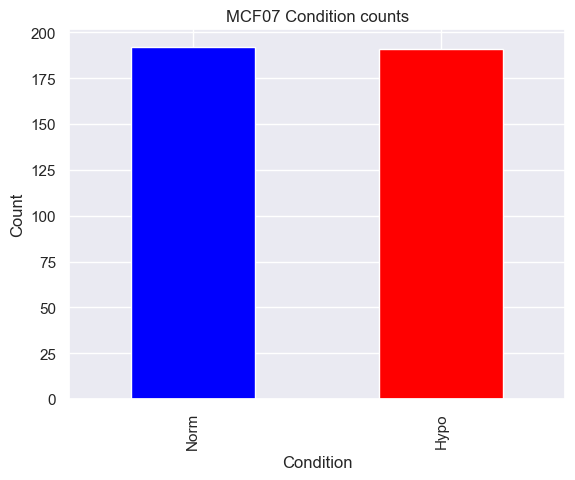

In [38]:
# before starting the analysis of seqdata we check the counts for Norm or Hypo as we did for the other dataset
# in the column 'Condition' for both the datasets count the number of Norm and Hypo
counts = df_metaM['Condition'].value_counts()
# Histogram of the counts
print(counts)
# Plot the histogram with two columns for each condition
counts.plot(kind='bar', color=['blue', 'red'])
plt.title('MCF07 Condition counts')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

## Sequencing Data 

In [7]:
#We just create the path and the dataset on Python
df_seq_pathHFilt = '../ai_lab/SmartSeq/HCC1806_SmartS_Filtered_Data.txt'

df_seq_pathHFiltNorm = '../ai_lab/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt'

df_seq_pathHUnfilt = '../ai_lab/SmartSeq/HCC1806_SmartS_Unfiltered_Data.txt'

df_seq_pathMFilt = '../ai_lab/SmartSeq/MCF7_SmartS_Filtered_Data.txt'

df_seq_pathMFiltNorm = '../ai_lab/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt'

df_seq_pathMUnfilt = '../ai_lab/SmartSeq/MCF7_SmartS_Unfiltered_Data.txt'

df_seq_HFilt = pd.read_csv(df_seq_pathHFilt, delimiter=' ')

df_seq_HFiltNorm = pd.read_csv(df_seq_pathHFiltNorm, delimiter=' ')

df_seq_HUnfilt = pd.read_csv(df_seq_pathHUnfilt, delimiter=' ')

df_seq_MFilt = pd.read_csv(df_seq_pathMFilt, delimiter=' ')

df_seq_MFiltNorm = pd.read_csv(df_seq_pathMFiltNorm, delimiter=' ')

df_seq_MUnfilt = pd.read_csv(df_seq_pathMUnfilt, delimiter=' ')

In [15]:
# Focus now on MCF7 Unfiltered
print("Dataframe dimension:", df_seq_MUnfilt.shape)
print("First Column:", df_seq_MUnfilt.iloc[:,0])
print("Columns list:", list(df_seq_MUnfilt.columns))

Dataframe dimension: (22934, 383)
First Column: WASH7P         0
MIR6859-1      0
WASH9P         1
OR4F29         0
MTND1P23       0
            ... 
MT-TE          4
MT-CYB       270
MT-TT          0
MT-TP          5
MAFIP          8
Name: output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam, Length: 22934, dtype: int64
Columns list: ['output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam', 'output.STAR.1_A8_Hypo_S26_Aligned.sortedByCoord.out.bam', 'output.STAR

In [40]:
# Check for the types of data in the dataframe
print("Data types in the dataframe:", df_seq_MUnfilt.dtypes.unique())
# Check for features
gene_symbols = df_seq_MUnfilt.index
print("Gene symbols in the dataframe:",gene_symbols)

Data types in the dataframe: [dtype('int64')]
Gene symbols in the dataframe: Index(['WASH7P', 'MIR6859-1', 'WASH9P', 'OR4F29', 'MTND1P23', 'MTND2P28',
       'MTCO1P12', 'MTCO2P12', 'MTATP8P1', 'MTATP6P1',
       ...
       'MT-TH', 'MT-TS2', 'MT-TL2', 'MT-ND5', 'MT-ND6', 'MT-TE', 'MT-CYB',
       'MT-TT', 'MT-TP', 'MAFIP'],
      dtype='object', length=22934)


In [41]:
# Take the transpose of the dataframe
print("Dataframe dimension before transpose:", df_seq_MUnfilt.shape)
df_seq_MUnfilt = df_seq_MUnfilt.T
print("Dataframe dimension after transpose:", df_seq_MUnfilt.shape)
df_seq_MUnfilt.head(5)

Dataframe dimension before transpose: (22934, 383)
Dataframe dimension after transpose: (383, 22934)


,WASH7P,MIR6859-1,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,MTATP6P1,...,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,0,0,1,0,0,2,2,0,0,29,...,0,0,0,505,147,4,270,0,5,8
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,0,0,0,0,0,1,1,1,0,12,...,0,0,0,1,0,0,76,0,0,0
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,7,...,1,0,0,44,8,0,66,0,1,0
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,68,...,0,0,0,237,31,3,727,0,0,0


In [42]:
# Which gene is expressed the least
min_expressed_gene = df_seq_MUnfilt.sum(axis=0).idxmin()
print("Gene with the least expression:", min_expressed_gene)
print("Number of samples:", df_seq_MUnfilt.sum(axis=0).min())
# Which gene is expressed the most
max_expressed_gene = df_seq_MUnfilt.sum(axis=0).idxmax()
print("Gene with the most expression:", max_expressed_gene)
print("Number of samples:", df_seq_MUnfilt.sum(axis=0).max())

Gene with the least expression: CICP3
Number of samples: 2
Gene with the most expression: KRT8
Number of samples: 8829208


In [43]:
# Now we look at evetual missing values in the dataframe
print("Missing values in the dataframe by columns:", df_seq_MUnfilt.isnull().sum())
print("Missing values in the whole dataframe:", df_seq_MUnfilt.isna().sum().sum())

Missing values in the dataframe by columns: WASH7P       0
MIR6859-1    0
WASH9P       0
OR4F29       0
MTND1P23     0
            ..
MT-TE        0
MT-CYB       0
MT-TT        0
MT-TP        0
MAFIP        0
Length: 22934, dtype: int64
Missing values in the whole dataframe: 0


In [44]:
# Summary statistics of the dataframe
df_seq_MUnfilt.describe()

,WASH7P,MIR6859-1,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,MTATP6P1,...,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP
count,383.000000,383.000000,383.000000,383.00000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,...,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.00000,383.000000,383.000000,383.000000
mean,0.133159,0.026110,1.344648,0.05483,0.049608,6.261097,4.681462,0.524804,0.073107,222.054830,...,1.060052,0.443864,3.146214,1016.477807,204.600522,5.049608,2374.97389,2.083551,5.626632,1.749347
std,0.618664,0.249286,2.244543,0.31477,0.229143,7.565749,6.232649,0.980857,0.298131,262.616874,...,1.990566,1.090827,4.265352,1009.444811,220.781927,6.644302,2920.39000,3.372714,7.511180,3.895204
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,...,0.000000,0.000000,0.000000,172.000000,30.500000,0.000000,216.50000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000,2.000000,0.000000,0.000000,98.000000,...,0.000000,0.000000,1.000000,837.000000,152.000000,3.000000,785.00000,0.000000,3.000000,0.000000
75%,0.000000,0.000000,2.000000,0.00000,0.000000,10.000000,7.000000,1.000000,0.000000,370.500000,...,1.000000,0.000000,5.000000,1549.000000,294.000000,7.000000,4059.00000,3.000000,8.000000,2.000000
max,9.000000,4.000000,20.000000,3.00000,2.000000,45.000000,36.000000,6.000000,2.000000,1662.000000,...,15.000000,8.000000,22.000000,8115.000000,2002.000000,46.000000,16026.00000,22.000000,56.000000,32.000000


In [45]:
def add_target_column(data, metadata_path, target_column_name, target_category):
    df_meta = pd.read_csv(metadata_path, delimiter='\t')
    df_meta.set_index('Filename', inplace=True)
    merged_transition = pd.merge(data, df_meta[target_column_name], left_index=True, right_index=True)
    dummy_variables = pd.get_dummies(merged_transition[target_column_name], prefix='category').astype('int')
    
    # Set the target category to 1 and the others to 0
    dummy_variables['Target'] = dummy_variables[target_category]
    dummy_variables.drop(columns=[col for col in dummy_variables.columns if col != 'Target'], inplace=True)
    
    merged_data = pd.concat([merged_transition, dummy_variables], axis=1)
    merged_data.drop(columns=[target_column_name], inplace=True)
    return merged_data

In [46]:
merged = add_target_column(df_seq_MUnfilt, df_metaM_path, 'Condition', 'category_Norm')

In [47]:
merged.head()

,WASH7P,MIR6859-1,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,MTATP6P1,...,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP,Target
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,0,0,1,0,0,2,2,0,0,29,...,0,0,505,147,4,270,0,5,8,0
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,0,0,0,0,0,1,1,1,0,12,...,0,0,1,0,0,76,0,0,0,0
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,7,...,0,0,44,8,0,66,0,1,0,1
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,68,...,0,0,237,31,3,727,0,0,0,1


We are now ready to replicate the work done in the first analysis, but this time with this dataset

## Duplicates and cells correlation 

Number of duplicates in the dataframe: 0


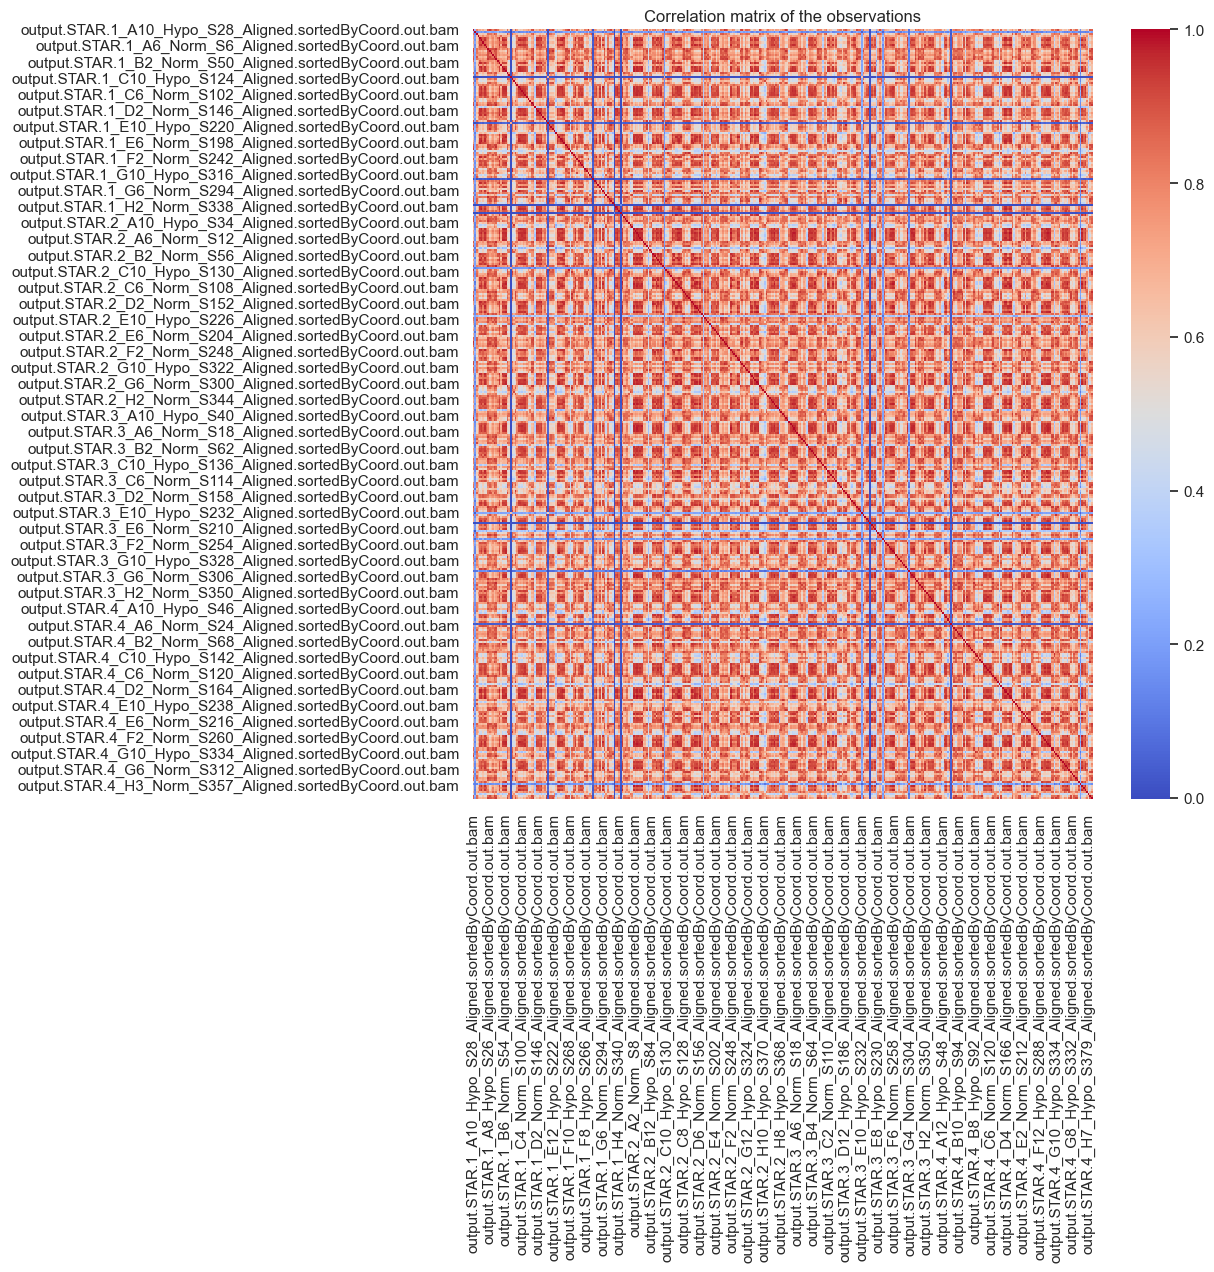

In [48]:
# Check for duplicates
print("Number of duplicates in the dataframe:", merged.duplicated().sum())
# we will now check for duplicates in a broader sense, by checking for observations with high correlation
# we start by computing the correlation matrix of the observations
merged_t = merged.T
correlation_matrix_transpose = merged_t.corr()
# now we plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix_transpose, cmap='coolwarm')
plt.title('Correlation matrix of the observations')
plt.show()

In [49]:
# now we will check for observations with high correlation and drop them
columns_to_keep = []

def add_representative(corr_matrix, col, threshold=0.95):
    corr = corr_matrix[col].drop(col)
    max_corr_id = corr.idxmax()
    max_corr = corr[max_corr_id]
    if max_corr < threshold:
        columns_to_keep.append(col)
        return None
    else:
        if (col not in columns_to_keep) and (max_corr_id not in columns_to_keep):
            columns_to_keep.append(col)
            print('choosing %s as representative for %s with correlation %s' % (col, max_corr_id, max_corr))
            return None
        


for col in merged_t:
    add_representative(correlation_matrix_transpose, col, 0.95)

dropped_cols = [col for col in merged_t if col not in columns_to_keep]

merged_uncorr_obs = merged_t[columns_to_keep].T
print('dropped %s observations' % str(len(dropped_cols)))
merged_uncorr_obs

choosing output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam as representative for output.STAR.2_E9_Hypo_S225_Aligned.sortedByCoord.out.bam with correlation 0.9605716902488992
choosing output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam as representative for output.STAR.1_F1_Norm_S241_Aligned.sortedByCoord.out.bam with correlation 0.975497360545813
choosing output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam as representative for output.STAR.1_E5_Norm_S197_Aligned.sortedByCoord.out.bam with correlation 0.980653715556717
choosing output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam as representative for output.STAR.4_D6_Norm_S168_Aligned.sortedByCoord.out.bam with correlation 0.9834123595391531
choosing output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam as representative for output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam with correlation 0.9655061013299151
choosing output.STAR.1_A8_Hypo_S26_Aligned.sortedByCoord.out.bam as representative for output.STAR.3_A11_

choosing output.STAR.3_A6_Norm_S18_Aligned.sortedByCoord.out.bam as representative for output.STAR.4_A1_Norm_S19_Aligned.sortedByCoord.out.bam with correlation 0.9675931039307185
choosing output.STAR.3_B11_Hypo_S89_Aligned.sortedByCoord.out.bam as representative for output.STAR.4_D7_Hypo_S187_Aligned.sortedByCoord.out.bam with correlation 0.9569842718838177
choosing output.STAR.3_B1_Norm_S61_Aligned.sortedByCoord.out.bam as representative for output.STAR.3_G6_Norm_S306_Aligned.sortedByCoord.out.bam with correlation 0.9681136641981721
choosing output.STAR.3_B2_Norm_S62_Aligned.sortedByCoord.out.bam as representative for output.STAR.3_C2_Norm_S110_Aligned.sortedByCoord.out.bam with correlation 0.9638969024200963
choosing output.STAR.3_B4_Norm_S64_Aligned.sortedByCoord.out.bam as representative for output.STAR.4_A6_Norm_S24_Aligned.sortedByCoord.out.bam with correlation 0.9569772005972526
choosing output.STAR.3_B7_Hypo_S85_Aligned.sortedByCoord.out.bam as representative for output.STAR.3_

,WASH7P,MIR6859-1,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,MTATP6P1,...,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP,Target
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,0,0,1,0,0,2,2,0,0,29,...,0,0,505,147,4,270,0,5,8,0
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,0,0,0,0,0,1,1,1,0,12,...,0,0,1,0,0,76,0,0,0,0
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,7,...,0,0,44,8,0,66,0,1,0,1
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,68,...,0,0,237,31,3,727,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam,0,0,0,0,1,45,35,1,2,1662,...,4,11,3814,538,12,12761,4,56,0,1
output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam,0,0,0,0,0,1,0,0,0,131,...,0,1,452,19,0,1368,0,2,1,1
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,0,0,1,0,0,2,5,5,0,370,...,0,2,1612,215,6,3477,3,7,6,1
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,1,0,1,0,0,7,0,0,0,33,...,0,0,62,20,0,349,0,2,0,0


## Sparsity and NANs

In [50]:
# Check for sparsity
total_elements = merged.shape[0] * merged.shape[1]
print("Total number of elements in the DataFrame:", total_elements)
missing_values = (merged == 0).sum().sum()
print("Total number of missing values in the DataFrame:", missing_values)
# Calculate the sparsity as the percentage of missing values
sparsity = (missing_values / total_elements) * 100
print("Sparsity of the DataFrame: {:.2f}%".format(sparsity))

Total number of elements in the DataFrame: 8784105
Total number of missing values in the DataFrame: 5289337
Sparsity of the DataFrame: 60.21%


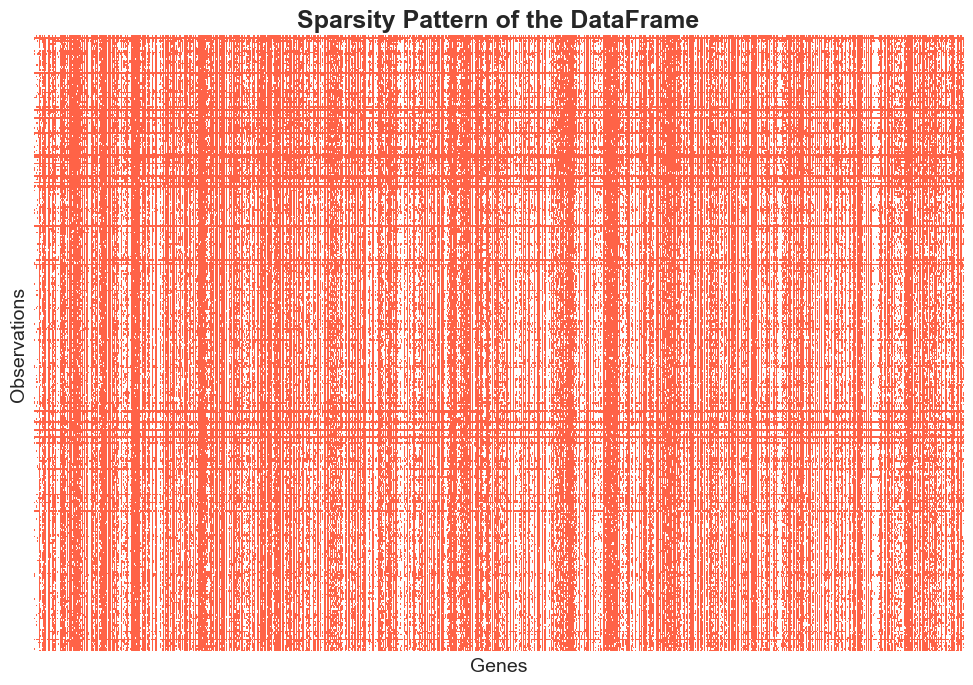

In [51]:
# Create a binary DataFrame indicating missing values (1 for missing, 0 for not missing)
missing_mask = merged == 0

# Set up a custom color palette
colors = ["#FFFFFF", "#FF6347"]  # White for non-missing, red for missing

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(missing_mask, cmap=sns.color_palette(colors), cbar=False, xticklabels=False, yticklabels=False)

# Add title and labels with custom font size and style
plt.title('Sparsity Pattern of the DataFrame', fontsize=18, fontweight='bold')
plt.xlabel('Genes', fontsize=14)
plt.ylabel('Observations', fontsize=14)

# Remove the spines (borders) of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [52]:
## checking colomns that have all missing values
zero_columns = []
for column in merged.columns:
    if (merged[column] == 0).all():
        zero_columns.append(column)
if zero_columns == []:
    print ("There are no columns full of 0")
## check rows all missing values 
zero_rows = []
for index, row in merged.iterrows():
    if (row == 0).all():
        zero_rows.append(index)
if zero_rows == []:
    print("There are no rows full of 0")

There are no columns full of 0
There are no rows full of 0


Number of columns with a high number (>99%) of 0 values: 2546


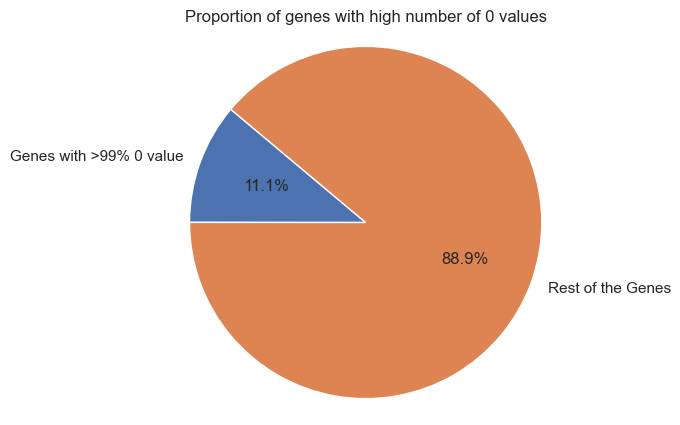

In [53]:
missing_value_columns = []
threshold = 0.99* len(merged.index)
for column in merged.columns:
    missing_count = (merged[column] == 0).sum()
    if missing_count >= threshold:
        missing_value_columns.append(column)

print("Number of columns with a high number (>99%) of 0 values:", len(missing_value_columns))

## Now a plot of the percentage of colomns with a lot of zeros, meaning the genes that are not responsive to the experiment
labels = ['Genes with >99% 0 value', 'Rest of the Genes']
percentages = [(len(missing_value_columns)*100)/len(merged.columns),100-((len(missing_value_columns)*100)/len(merged.columns)) ]  # percentages corresponding to each category

# Plot the pie chart
plt.figure(figsize=(5, 5))  # specify the size of the plot
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Proportion of genes with high number of 0 values')
plt.show()

NaNs

In [54]:
# Check for NaN values
print("Number of NaN values in the DataFrame:", merged.isna().sum().sum())

Number of NaN values in the DataFrame: 0


## Outliers

#### Boxplot

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 90.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 94.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 85.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\franc\AppData\Local\Packages\Py

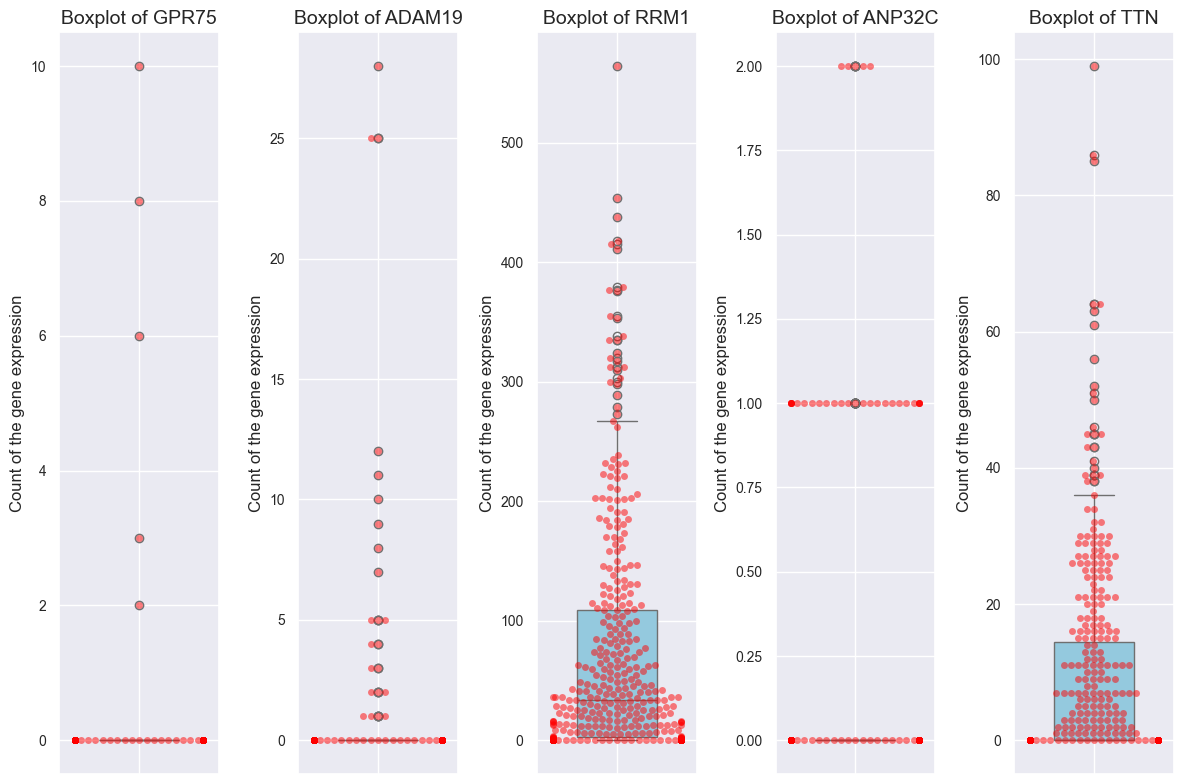

In [55]:
np.random.seed(42)

# Number of boxplots you want to create
num_boxplots = 5

# Randomly select column indices
random_columns = np.random.choice(merged.columns[1:], num_boxplots, replace=False)


plt.figure(figsize=(12, 8))  
for i, column in enumerate(random_columns):
    plt.subplot(1, len(random_columns), i+1)
    
    # Customizing boxplot appearance
    sns.boxplot(y=merged[column], color='skyblue', width=0.5)
    
    # Overlaying swarmplot for better visualization of individual data points
    sns.swarmplot(y=merged[column], color='red', alpha=0.5)
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.ylabel('Count of the gene expression', fontsize=12)
    plt.xlabel('', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)


plt.tight_layout()
plt.show()

#### IQR

In [56]:
# Outliers with Inter-Quartile Range (IQR) proximity rule for each column
Q1 = merged.quantile(0.25)
Q3 = merged.quantile(0.75)
IQR = Q3 - Q1
outliers = (merged < (Q1 - 1.5 * IQR)) | (merged > (Q3 + 1.5 * IQR))
# Print outliers fora each column
print("Number of outliers in the DataFrame:", outliers.sum())
# Print outliers percentage
outliers_percentage = (outliers.sum().sum() / total_elements) * 100
print("{:.2f}%".format(outliers_percentage))

Number of outliers in the DataFrame: WASH7P       32
MIR6859-1     6
WASH9P       18
OR4F29       14
MTND1P23     18
             ..
MT-CYB       10
MT-TT        27
MT-TP        21
MAFIP        37
Target        0
Length: 22935, dtype: int64
6.19%


#### After Normalization

In [57]:
# now we normalize each column independently
scaler = StandardScaler()

features_df_normalized = merged[merged.columns[:-1]].copy()
features_df_normalized[features_df_normalized.columns] = scaler.fit_transform(features_df_normalized[features_df_normalized.columns])
features_df_normalized.describe()

,WASH7P,MIR6859-1,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,MTATP6P1,...,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP
count,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,383.000000,3.830000e+02,3.830000e+02,3.830000e+02,...,3.830000e+02,3.830000e+02,3.830000e+02,383.000000,3.830000e+02,3.830000e+02,3.830000e+02,383.000000,3.830000e+02,3.830000e+02
mean,-4.638007e-17,-1.855203e-17,1.855203e-17,-1.391402e-17,-5.565609e-17,3.710406e-17,0.000000,4.638007e-17,-3.710406e-17,-5.565609e-17,...,3.710406e-17,3.710406e-17,3.710406e-17,0.000000,9.276015e-17,-3.710406e-17,4.638007e-17,0.000000,3.710406e-17,-2.782804e-17
std,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308,1.001308e+00,1.001308e+00,1.001308e+00,...,1.001308e+00,1.001308e+00,1.001308e+00,1.001308,1.001308e+00,1.001308e+00,1.001308e+00,1.001308,1.001308e+00,1.001308e+00
min,-2.155182e-01,-1.048746e-01,-5.998576e-01,-1.744196e-01,-2.167786e-01,-8.286406e-01,-0.752102,-5.357467e-01,-2.455385e-01,-8.466527e-01,...,-5.332347e-01,-4.074384e-01,-7.385861e-01,-1.008284,-9.279208e-01,-7.609849e-01,-8.143024e-01,-0.618575,-7.500808e-01,-4.496904e-01
25%,-2.155182e-01,-1.048746e-01,-5.998576e-01,-1.744196e-01,-2.167786e-01,-8.286406e-01,-0.752102,-5.357467e-01,-2.455385e-01,-7.589581e-01,...,-5.332347e-01,-4.074384e-01,-7.385861e-01,-0.837671,-7.895948e-01,-7.609849e-01,-7.400715e-01,-0.618575,-7.500808e-01,-4.496904e-01
50%,-2.155182e-01,-1.048746e-01,-5.998576e-01,-1.744196e-01,-2.167786e-01,-4.315980e-01,-0.430791,-5.357467e-01,-2.455385e-01,-4.729974e-01,...,-5.332347e-01,-4.074384e-01,-5.038322e-01,-0.178031,-2.385581e-01,-3.088796e-01,-5.451510e-01,-0.618575,-3.501537e-01,-4.496904e-01
75%,-2.155182e-01,-1.048746e-01,2.923578e-01,-1.744196e-01,-2.167786e-01,4.948346e-01,0.372485,4.851040e-01,-2.455385e-01,5.659931e-01,...,-3.020788e-02,-4.074384e-01,4.351835e-01,0.528230,4.054517e-01,2.939275e-01,5.773985e-01,0.272080,3.163914e-01,6.443325e-02
max,1.435098e+01,1.596191e+01,8.322296e+00,9.368822e+00,8.522823e+00,5.126998e+00,5.031489,5.589357e+00,6.471693e+00,5.490236e+00,...,7.012167e+00,6.936040e+00,4.426000e+00,7.041304,8.151711e+00,6.171296e+00,4.680499e+00,5.912894,6.715224e+00,7.776287e+00


{'whiskers': [<matplotlib.lines.Line2D at 0x2053635a840>,
 'caps': [<matplotlib.lines.Line2D at 0x2053635b140>,
 'boxes': [<matplotlib.lines.Line2D at 0x20536359d30>],
 'medians': [<matplotlib.lines.Line2D at 0x2053635bc20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2053635bfb0>],
 'means': []}

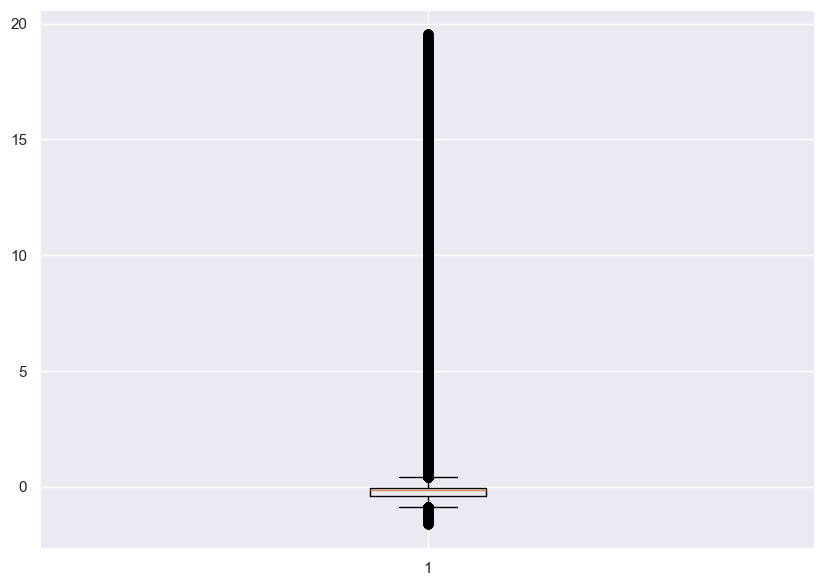

In [58]:
# convert the dataframe to a numpy array, find outliers
features_array_normalized = np.array(features_df_normalized.T)
# still need to find the outliers
fig = plt.figure(figsize=(10, 7))
plt.boxplot(features_array_normalized.flatten())
# here, we notice that most of the data are outliers

## Distribution 

#### Histogram

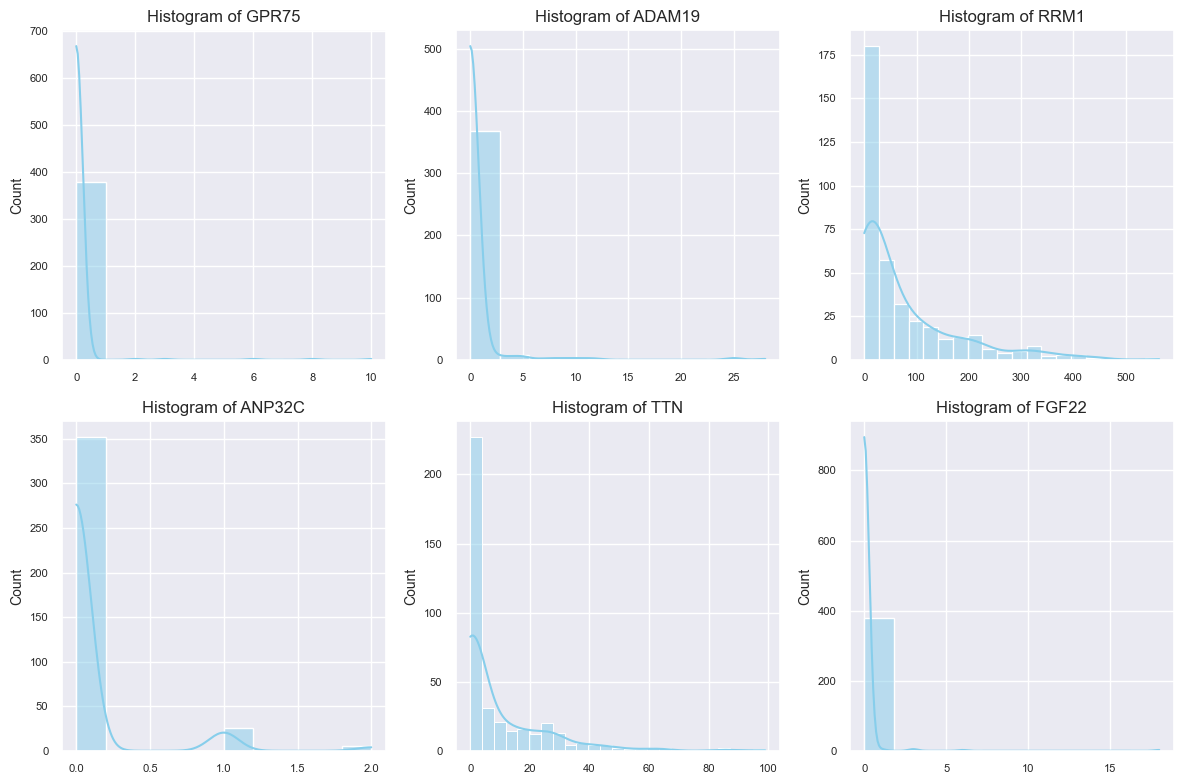

In [59]:
#visualize the distribution of the data through histograms
np.random.seed(42)

# Number of boxplots you want to create
num_boxplots = 6

# Randomly select column indices
random_columns = np.random.choice(merged.columns[1:], num_boxplots, replace=False)



fig = plt.figure(figsize=(12, 8))
for i, column in enumerate(random_columns):  # Adjusted to only consider the first 5 columns
    plt.subplot(2, 3, i+1)  # Adjusted to fit in a 2x3 grid
    sns.histplot(merged[column], kde=True, color='skyblue')
    plt.title(f'Histogram of {column}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(True)
plt.tight_layout()
plt.show()


#### Test for Normality

In [60]:
# Calculate skewness for each column in your DataFrame
skewness_values = merged[random_columns].skew()

# Print skewness values
print("Skewness for each selected feature:")
print(skewness_values)

Skewness for each selected feature:
GPR75     11.008745
ADAM19     8.010600
RRM1       1.855538
ANP32C     3.789950
TTN        2.383052
FGF22     16.108174
dtype: float64


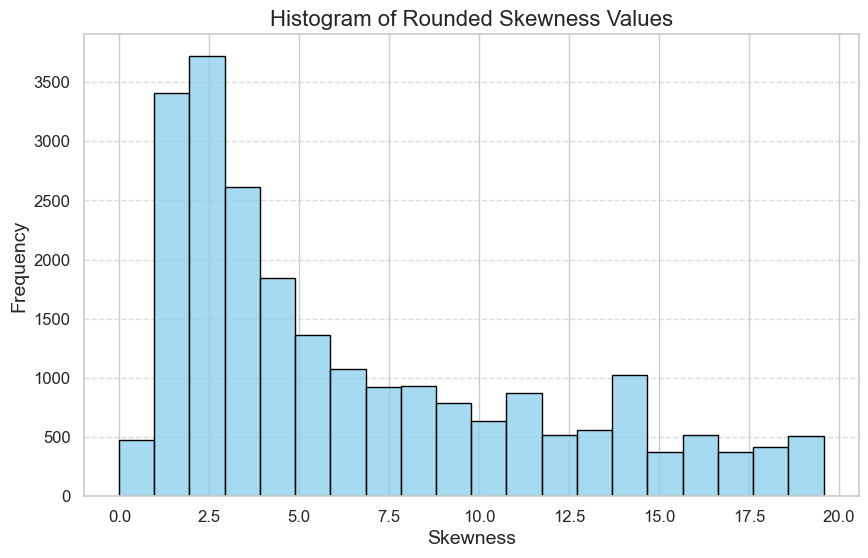

In [61]:
# Calculate skewness for each column in your DataFrame
skewness_values = merged.skew()

# Round the skewness values
rounded_skewness_values = np.round(skewness_values, decimals=2)

# Set seaborn style
sns.set(style="whitegrid")

# Plot a histogram of rounded skewness values
plt.figure(figsize=(10, 6))
sns.histplot(rounded_skewness_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Rounded Skewness Values', fontsize=16)
plt.xlabel('Skewness', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [62]:
# Calculate kurtosis for each column in your DataFrame
kurtosis_values = merged[random_columns].kurtosis()

# Print kurtosis values
print("Kurtosis for each feature:")
print(kurtosis_values)

Kurtosis for each feature:
GPR75     127.631126
ADAM19     71.421855
RRM1        3.367925
ANP32C     14.824711
TTN         7.190659
FGF22     281.553685
dtype: float64


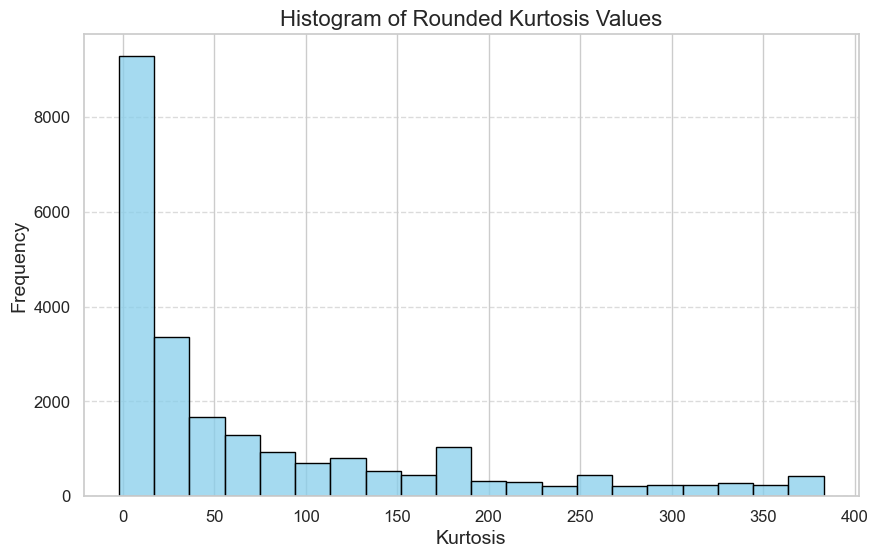

In [63]:
# Calculate kurtosis for each column in your DataFrame
kurtosis_values = merged.kurtosis()

# Round the kurtosis values
rounded_kurtosis_values = np.round(kurtosis_values, decimals=2)

# Set seaborn style
sns.set(style="whitegrid")

# Plot a histogram of rounded kurtosis values
plt.figure(figsize=(10, 6))
sns.histplot(rounded_kurtosis_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Rounded Kurtosis Values', fontsize=16)
plt.xlabel('Kurtosis', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [64]:
# Test the distribution of the data matrix using Kolmogorov-Smirnov
# Test normality of each feature
def test_distribution_per_feature(data):
    non_normal_count = 0
    for column in data.columns:
        p_value = kstest(data[column], 'norm')[1]
        if p_value < 0.05:
            non_normal_count += 1
    if data.shape[1] == non_normal_count:
        print("All features have non-normal distribution")
    else:
        print("Not all features have non-normal distribution")
        print("Number of features with non-normal distribution:", non_normal_count)

    return non_normal_count

non_normal_count = test_distribution_per_feature(merged)

All features have non-normal distribution


#### Test for other distributions 

In [65]:
# Iterate over columns and perform the test
def test_poissondistribution_per_feature(data):
    poisson_list = [] # initialize list to store features with Poisson distribution
    for column in data.columns:
        observed_values = data[column].values  # values of the column
        support = np.unique(observed_values) # unique values in the column
        mean = observed_values.mean() # mean of the column (we will need this for the Poisson distribution)
        obs_freq = [] # initialize an empty array to store observed frequencies
        for value in support:
            obs_freq.append((observed_values == value).sum()) # count the number of times each unique value appears in the column
        exp_freq = [] # initialize an empty array to store expected frequencies
        for value in support:
            exp_freq.append(poisson.pmf(value, mean) * len(observed_values)) # calculate the expected frequency for each unique value
        # normalize the observed and expected frequencies
        obs_freq = obs_freq / np.sum(obs_freq)
        exp_freq = exp_freq / np.sum(exp_freq)
        
        # perform the chi-square test
        _, p = chisquare(obs_freq, exp_freq)
        
        # if p-value is greater than 0.05, we don't reject the null hypothesis that the data doesn't follow a Poisson distribution
        if p >= 0.05:
            poisson_list.append(column)
    if len(poisson_list) == 0:
        print("All features have non-poisson distribution")
    else:
        print("Some features might have poisson distribution")
        print("Number of features that might have poisson distribution:", len(poisson_list))

    return poisson_list

poisson_columns = test_poissondistribution_per_feature(merged)

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_stats_py.py:8064: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_stats_py.py:8064: RuntimeWarning: overflow encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


Some features might have poisson distribution
Number of features that might have poisson distribution: 2886


In [61]:
# now we plot the hist of the poisson columns
#now we visualize the empirical distribution against the Gamma distribution for some columns
np.random.seed(42)

# Number of boxplots you want to create
num_boxplots = 3

# Randomly select column indices
random_columns = np.random.choice(poisson_columns, num_boxplots, replace=False)

fig = plt.figure(figsize=(12, 8))
for i, column in enumerate(random_columns):  # Adjusted to only consider the first 5 columns
    plt.subplot(2, 3, i+1)  # Adjusted to fit in a 2x3 grid
    observed_values = merged[column].values  # Observed counts from your data
    mean = observed_values.mean()
    poisson_values = np.random.poisson(mean, len(observed_values))
    stats.probplot(observed_values, dist='poisson', sparams=(mean,), plot=plt)
    plt.title(f'QQ-plot of {column}', fontsize=12)

    plt.subplot(2, 3, i+4)
    sns.histplot(observed_values, kde=True, color='skyblue', label='Observed', bins=30)
    sns.histplot(poisson_values, kde=True, color='red', label='Gamma', bins=30)
    plt.title(f'Histogram of {column}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'poisson_columns' is not defined

In [60]:
print('Values of the SLC25A1P4 gene:', observed_values)

NameError: name 'observed_values' is not defined

In [68]:
# Iterate over columns and perform the test
def test_negative_binomial_distribution_per_feature(data):
    nbin_list = [] # initialize list to store features with Gamma distribution
    for column in data.columns:
        observed_values = data[column].values  # values of the column
        support = np.unique(observed_values) # unique values in the column
        mean = observed_values.mean() # mean of the column (we will need this for the nbinom distribution)
        var = observed_values.var() # variance of the column (we will need this for the nbinom distribution)
        size = mean ** 2 / (var - mean) # size parameter of the nbinom distribution
        prob = 1 - (mean/var) # probability parameter of the nbinom distribution
        obs_freq = [] # initialize an empty array to store observed frequencies
        for value in support:
            obs_freq.append((observed_values == value).sum()) # count the number of times each unique value appears in the column
        exp_freq = [] # initialize an empty array to store expected frequencies
        for value in support:
            exp_freq.append(nbinom.pmf(value, size, prob) * len(observed_values)) # calculate the expected frequency for each unique value
        # normalize the observed and expected frequencies
        obs_freq = obs_freq / np.sum(obs_freq)
        exp_freq = exp_freq / np.sum(exp_freq)
        
        # perform the chi-square test
        _, p = chisquare(obs_freq, exp_freq)
        
        # if p-value is greater than 0.05, we don't reject the null hypothesis that the data doesn't follow a negative binomial distribution
        if p >= 0.05:
            nbin_list.append(column)
    if len(nbin_list) == 0:
        print("All features have non-Negative Binomial distribution")
    else:
        print("Some features might have Negative Binomial distribution")
        print("Number of features with Negative Binomial distribution:", len(nbin_list))

    return nbin_list

negative_binomial_columns = test_negative_binomial_distribution_per_feature(merged)

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_stats_py.py:8064: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_stats_py.py:8064: RuntimeWarning: overflow encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\franc\AppData\Local\Temp\ipykernel_18708\4107845048.py:19: RuntimeWarning: invalid value encountered in divide
  exp_freq = exp_freq / np.sum(exp_freq)


Some features might have Negative Binomial distribution
Number of features with Negative Binomial distribution: 2814


Percentage of zeros in the gene KCNG4: 99.0 %
Percentage of zeros in the gene RPL35AP35: 98.0 %
Percentage of zeros in the gene SNORA29: 97.0 %


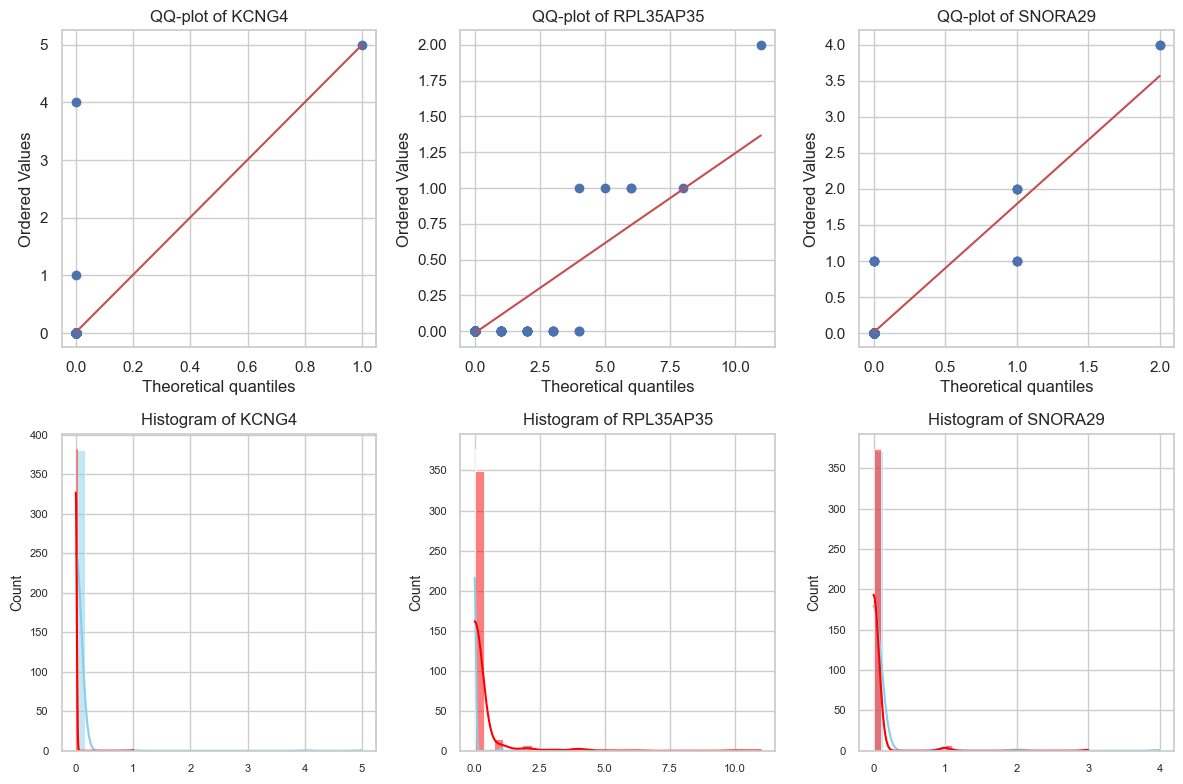

In [69]:
# now we plot the hist of the nbin columns
#now we visualize the empirical distribution against the negative binomial distribution for some columns

np.random.seed(100)

# Number of boxplots you want to create
num_boxplots = 3

# Randomly select column indices
random_columns = np.random.choice(negative_binomial_columns, num_boxplots, replace=False)

fig = plt.figure(figsize=(12, 8))
for i, column in enumerate(random_columns):  # Adjusted to only consider the first 5 columns
    plt.subplot(2, 3, i+1)  # Adjusted to fit in a 2x3 grid
    observed_values = merged[column].values  # Observed counts from your data
    print(f'Percentage of zeros in the gene {column}:', np.round((observed_values == 0).sum() / len(observed_values) * 100), '%')
    mean = observed_values.mean() # mean of the column (we will need this for the nbinom distribution)
    var = observed_values.var() # variance of the column (we will need this for the nbinom distribution)
    # HERE WE ARE CHEATING WITH THE ABSOLUTE VALUE AND THE "NORMALIZATION" OF THE PROB
    size = abs(mean ** 2 / (var - mean)) # size parameter of the nbinom distribution
    prob = 1 - (mean/var) # probability parameter of the nbinom distribution
    if prob < 0:
        prob = 0
    elif prob > 1:
        prob = 1
    stats.probplot(observed_values, dist='nbinom', sparams=(size,prob), plot=plt)
    plt.title(f'QQ-plot of {column}', fontsize=12)

    plt.subplot(2, 3, i+4)
    plt.title(f'QQ-plot of {column}', fontsize=12)
    nbinom_values = np.random.negative_binomial(size, prob, len(observed_values))
    sns.histplot(observed_values, kde=True, color='skyblue', label='Observed', bins=30)
    sns.histplot(nbinom_values, kde=True, color='red', label='Negative Binomial', bins=30)
    plt.title(f'Histogram of {column}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(True)
plt.tight_layout()
plt.show()

## Correlation 

In [44]:
# We will use pytorch correlation matrix to calculate the correlation matrix usint torch.corrcoef
# Correlation matrix between the genes (features)

# Convert the DataFrame to a PyTorch tensor
data_tensor = th.tensor(merged.values).T
# Calculate the correlation matrix
correlation_matrix = th.corrcoef(data_tensor)
print(correlation_matrix)

# Compute the midpoint
midpoint = (correlation_matrix.max() - correlation_matrix.min()) / 2 + correlation_matrix.min()
# Print the size of the correlation matrix
print("Size of the correlation matrix: ", correlation_matrix.shape)
# Print average and minimum correlation values
print("Average correlation between cells: ", float(midpoint))
print("Minimum correlation between cells: ", float(correlation_matrix.min()), "\n")

NameError: name 'th' is not defined

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', yticklabels = False, xticklabels = False)
plt.xlabel('Sample')
plt.ylabel('Sample')
plt.show()

In [ ]:
# Flatten the correlation matrix
correlation_values = correlation_matrix.flatten()

# Randomly sample a subset of correlation values
sample_size = 10000  # Adjust sample size as needed
sampled_correlation_values = np.random.choice(correlation_values, size=sample_size)

# Plot the histogram of the sampled correlation values
plt.figure(figsize=(12, 6))
sns.histplot(sampled_correlation_values, kde=True, color='skyblue', bins=30)
plt.title('Histogram of sampled correlation values', fontsize=14)
plt.xlabel('Correlation value', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

In [ ]:
# Sample 1000 columns randomly from merged
sampled_columns = np.random.choice(merged.columns, 1000, replace=False)
sampled_data = merged[sampled_columns]

# Compute the correlation matrix with numpy
correlation_matrix_sample = sampled_data.corr()

# Drop diagonal values (self-correlations)
np.fill_diagonal(correlation_matrix_sample.values, np.nan)

# Extract the top 5 correlated pairs
top_5_correlated_pairs = correlation_matrix_sample.unstack().sort_values(ascending=False).dropna().head(5)
print("Top 5 correlated pairs (excluding diagonal):")
print(top_5_correlated_pairs)
#we convert top_5_correlated_pairs to a dataframe
top_5_correlated_pairs = top_5_correlated_pairs.to_frame().reset_index()
top_5_correlated_pairs.columns = ['Gene 1', 'Gene 2', 'Correlation']

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(25, 5))  # Adjusted figsize for better visualization
for i, (gene1, gene2, corr) in enumerate(top_5_correlated_pairs.values):
    axs[i].hist(merged[gene1], color='lightcoral', alpha=0.5, bins=20, orientation='vertical')
    axs[i].hist(merged[gene2], color='lightgreen', alpha=0.5, bins=20, orientation='vertical')
    axs[i].set_xlabel('Frequency')
    axs[i].set_ylabel('Value')
    axs[i].set_title(f'Correlation: {corr:.2f}')
    axs[i].legend([gene1, gene2])
    
plt.tight_layout()
plt.show()

#### More on cells correlation

In [ ]:
# Correlation between cells (samples)
# Plot histogram of the values to see the distribution
data_tensor = th.tensor(merged.values)
correlation_matrix_transpose = th.corrcoef(data_tensor)
plt.figure(figsize=(10, 6))
sns.histplot(correlation_matrix_transpose.flatten(), bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Correlation Matrix Values', fontsize=16)
plt.xlabel('Correlation Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# We now can plot the distribution of the correlation between gene expression profiles using a 
# histogram (we do it on the first ten variables)

correlation_matrix = pd.DataFrame(correlation_matrix_transpose)
print(correlation_matrix.shape)
c_subset = correlation_matrix.iloc[:,:100]
sns.histplot(c_subset,bins=100)
plt.legend().set_visible(True)
plt.ylabel('Frequency')
plt.xlabel('Correlation between cells expression profiles')
plt.plot()

In [ ]:
# from c_subset we extract the cells with lower correlation, and to do so we create a list with the 
# sum of the correlation of each cell with the rest of the cells
correlation_sum = c_subset.sum(axis=0)
#we take the 3 cells with the lowest correlation
low_correlation_cells = correlation_sum.nsmallest(3)
print('Cells with the lowest correlation:', merged.iloc[low_correlation_cells.index].index)

In [ ]:
# Create subplots separately for each cell
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot histograms for each cell
sns.histplot(merged.iloc[low_correlation_cells.index[0]], bins=30, color='blue', ax=axs[0])
axs[0].set_title(f'Distribution of gene expression', fontsize=16)
axs[0].set_ylabel('Frequency', fontsize=14)
axs[0].tick_params(axis='both', which='both', labelsize=12)
axs[0].grid(True)

sns.histplot(merged.iloc[low_correlation_cells.index[1]], bins=30, color='red', ax=axs[1])
axs[1].set_title(f'Distribution of gene expression', fontsize=16)
axs[1].set_ylabel('Frequency', fontsize=14)
axs[1].tick_params(axis='both', which='both', labelsize=12)
axs[1].grid(True)

sns.histplot(merged.iloc[low_correlation_cells.index[2]], bins=30, color='green', ax=axs[2])
axs[2].set_title(f'Distribution of gene expression', fontsize=16)
axs[2].set_ylabel('Frequency', fontsize=14)
axs[2].tick_params(axis='both', which='both', labelsize=12)
axs[2].grid(True)

plt.tight_layout()
plt.show()

for cell in low_correlation_cells.index:
    observed_values = merged.iloc[cell]
    print(f'Percentage of zeros in the cell {cell}:', ((observed_values == 0).sum() / len(observed_values) * 100), '%')

In [ ]:
merged_norm = merged[merged['Target'] == 0]
merged_hypo = merged[merged['Target'] == 1]

In [ ]:
# Transform the data to a tensor
data_tensor_norm = th.tensor(merged_norm.values)
data_tensor_hypo = th.tensor(merged_hypo.values)

# Calculate the correlation matrices
correlation_matrix_norm = th.corrcoef(data_tensor_norm)
correlation_matrix_hypo = th.corrcoef(data_tensor_hypo)

# Plot the correlation matrices with subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(correlation_matrix_norm, cmap='coolwarm', yticklabels = False, xticklabels = False, ax=axs[0], square=True)
sns.heatmap(correlation_matrix_hypo, cmap='coolwarm', yticklabels = False, xticklabels = False, ax=axs[1], square=True)
# Set titles with number of genes that are norm or hypo
axs[0].set_title(f'Normoxia ({merged_norm.shape[0]} cells)')
axs[1].set_title(f'Hypoxia ({merged_hypo.shape[0]} cells)')
plt.show() 

# Check shape of correlation matrices
print("Shape of correlation matrix for normoxia:", correlation_matrix_norm.shape)
print("Shape of correlation matrix for hypoxia:", correlation_matrix_hypo.shape)

# Compute the midpoint for Norm
midpoint_norm = (correlation_matrix_norm.max() - correlation_matrix_norm.min()) / 2 + correlation_matrix_norm.min()
# Print the size of the correlation matrix
print("Size of the correlation matrix: ", correlation_matrix_norm.shape)
# Print average and minimum correlation values
print("Average correlation between cells: ", float(midpoint_norm))
print("Minimum correlation between cells: ", float(correlation_matrix_norm.min()), "\n")

# Compute the midpoint for Hypo
midpoint_hypo = (correlation_matrix_hypo.max() - correlation_matrix_hypo.min()) / 2 + correlation_matrix_hypo.min()
# Print the size of the correlation matrix
print("Size of the correlation matrix: ", correlation_matrix_hypo.shape)
# Print average and minimum correlation values
print("Average correlation between cells: ", float(midpoint_hypo))
print("Minimum correlation between cells: ", float(correlation_matrix_hypo.min()), "\n")

## Description of the Original Dataset

We are now interested in doing the same data analysis that we did for the transposed dataset for the original dataset, i.e. we are interested in the description of the data with rows as genes and columns as cells.

In [70]:
# we simply transpose again the dataframe (now we have cells as columns)
print("Dataframe dimension before transpose:", df_seq_MUnfilt.shape)
df_seq_MUnfilt = df_seq_MUnfilt.T
print("Dataframe dimension after transpose:", df_seq_MUnfilt.shape)
df_seq_MUnfilt.head(5)

Dataframe dimension before transpose: (383, 22934)
Dataframe dimension after transpose: (22934, 383)


,output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam,output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam,output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam,output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam,output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam,...,output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam,output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam,output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam,output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam,output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam,output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam
WASH7P,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
MIR6859-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WASH9P,1,0,0,0,0,1,10,1,0,0,...,1,1,0,0,0,0,1,1,4,5
OR4F29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
MTND1P23,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [71]:

print("Missing values in the dataframe by columns:", df_seq_MUnfilt.isnull().sum())
print("Missing values in the whole dataframe:", df_seq_MUnfilt.isna().sum().sum())

Missing values in the dataframe by columns: output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam    0
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam    0
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam    0
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam      0
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam      0
                                                           ..
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam    0
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam    0
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam    0
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam    0
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam    0
Length: 383, dtype: int64
Missing values in the whole dataframe: 0


In [72]:
df_seq_MUnfilt.describe()

,output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam,output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam,output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam,output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam,output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam,...,output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam,output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam,output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam,output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam,output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam,output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam
count,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,...,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000
mean,40.817651,0.012253,86.442400,1.024636,14.531351,56.213613,75.397183,62.767725,67.396747,2.240734,...,17.362562,42.080230,34.692422,32.735284,21.992718,17.439391,49.242784,61.545609,68.289352,62.851400
std,465.709940,0.207726,1036.572689,6.097362,123.800530,503.599145,430.471519,520.167576,459.689019,25.449630,...,193.153757,256.775704,679.960908,300.291051,153.441647,198.179666,359.337479,540.847355,636.892085,785.670341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,0.000000,5.000000,0.000000,7.000000,23.000000,39.000000,35.000000,38.000000,1.000000,...,9.000000,30.000000,0.000000,17.000000,12.000000,9.000000,27.000000,30.000000,38.000000,33.000000
max,46744.000000,14.000000,82047.000000,289.000000,10582.000000,46856.000000,29534.000000,50972.000000,36236.000000,1707.000000,...,17800.000000,23355.000000,81952.000000,29540.000000,12149.000000,19285.000000,28021.000000,40708.000000,46261.000000,68790.000000


In [9]:
# Just renaming
mergedT = df_seq_MUnfilt

In [ ]:
# PLOT OUTLIERS 

We check for outliers with the same method used for the trasposed dataset.

In [74]:
# Outliers with Inter-Quartile Range (IQR) proximity rule for each column
Q1 = mergedT.quantile(0.25)
Q3 = mergedT.quantile(0.75)
IQR = Q3 - Q1
outliers = (mergedT < (Q1 - 1.5 * IQR)) | (mergedT > (Q3 + 1.5 * IQR))
# Print outliers fora each column
print("Number of outliers in the DataFrame:", outliers.sum())
# Print outliers percentage
outliers_percentage = (outliers.sum().sum() / total_elements) * 100
print("{:.2f}%".format(outliers_percentage))

Number of outliers in the DataFrame: output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam    3751
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam     188
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam    5329
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam      4739
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam      3511
                                                            ... 
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam    3286
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam    3490
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam    3410
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam    3306
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam    3250
Length: 383, dtype: int64
14.45%


Now we analyze distribution of the transpose dataset (rows are genes)

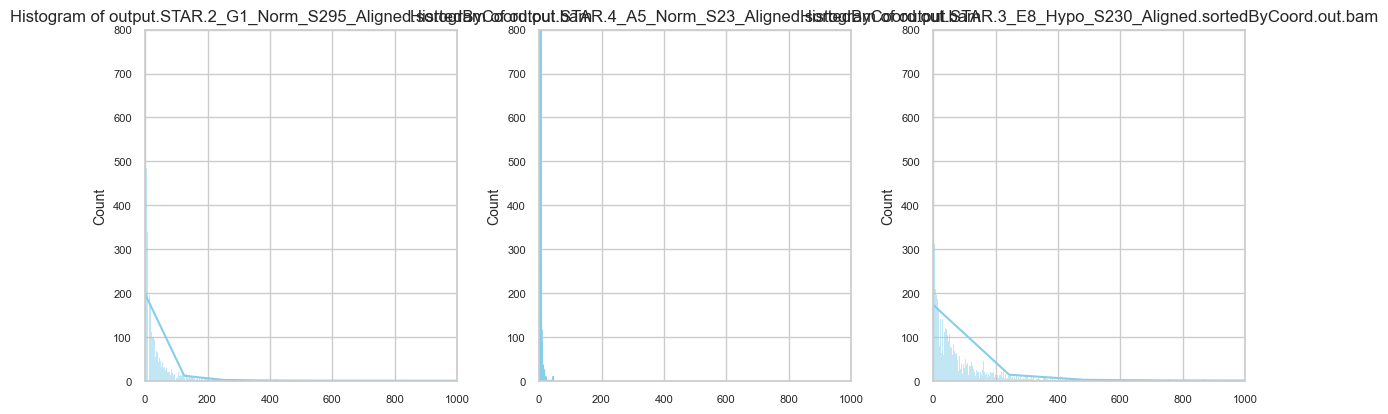

In [75]:
#visualize the distribution of the data through histograms
np.random.seed(45)

# Number of boxplots you want to create
num_boxplots = 3

# Randomly select column indices
random_columns = np.random.choice(mergedT.columns[1:], num_boxplots, replace=False)



fig = plt.figure(figsize=(12, 8))
for i, column in enumerate(random_columns):  # Adjusted to only consider the first 5 columns
    plt.subplot(2, 3, i+1)  # Adjusted to fit in a 2x3 grid
    sns.histplot(mergedT[column], kde=True, color='skyblue')
    plt.title(f'Histogram of {column}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=10)
    # rescale the y-axis to better visualize the distribution
    plt.ylim(0, 800)
    plt.xlim(0, 1000)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(True)
plt.tight_layout()
plt.show()

In [76]:
# Calculate skewness for each column in your DataFrame
skewness_valuesT = mergedT[random_columns].skew()

# Print skewness values
print("Skewness for each selected feature:")
print(skewness_valuesT)

Skewness for each selected feature:
output.STAR.2_G1_Norm_S295_Aligned.sortedByCoord.out.bam    70.296444
output.STAR.4_A5_Norm_S23_Aligned.sortedByCoord.out.bam      9.837371
output.STAR.3_E8_Hypo_S230_Aligned.sortedByCoord.out.bam    42.725818
dtype: float64


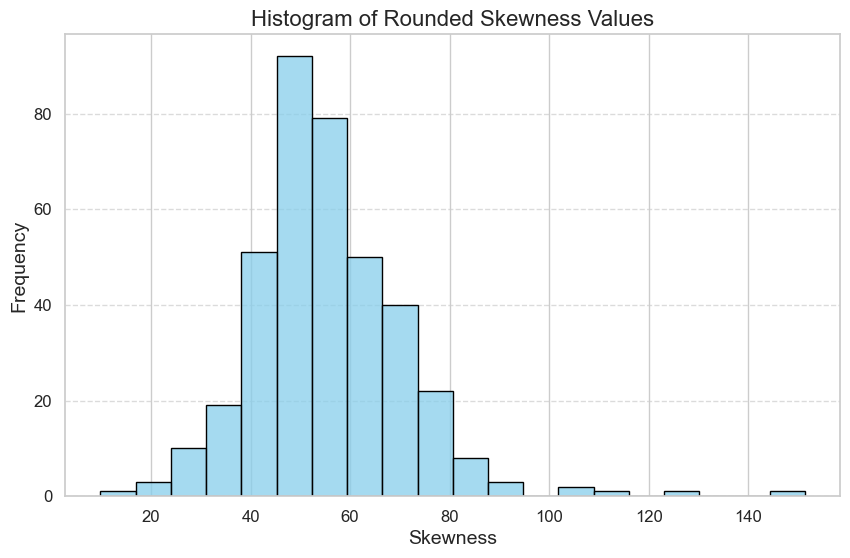

In [77]:
# Calculate skewness for each column in your DataFrame
skewness_valuesT = mergedT.skew()

# Round the skewness values
rounded_skewnessT_values = np.round(skewness_valuesT, decimals=2)

# Set seaborn style
sns.set(style="whitegrid")

# Plot a histogram of rounded skewness values
plt.figure(figsize=(10, 6))
sns.histplot(rounded_skewnessT_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Rounded Skewness Values', fontsize=16)
plt.xlabel('Skewness', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [78]:
# Calculate kurtosis for each column in your DataFrame
kurtosis_valuesT = mergedT[random_columns].kurtosis()

# Print kurtosis values
print("Kurtosis for each feature:")
print(kurtosis_valuesT)

Kurtosis for each feature:
output.STAR.2_G1_Norm_S295_Aligned.sortedByCoord.out.bam    5817.316533
output.STAR.4_A5_Norm_S23_Aligned.sortedByCoord.out.bam      282.433357
output.STAR.3_E8_Hypo_S230_Aligned.sortedByCoord.out.bam    2571.727424
dtype: float64


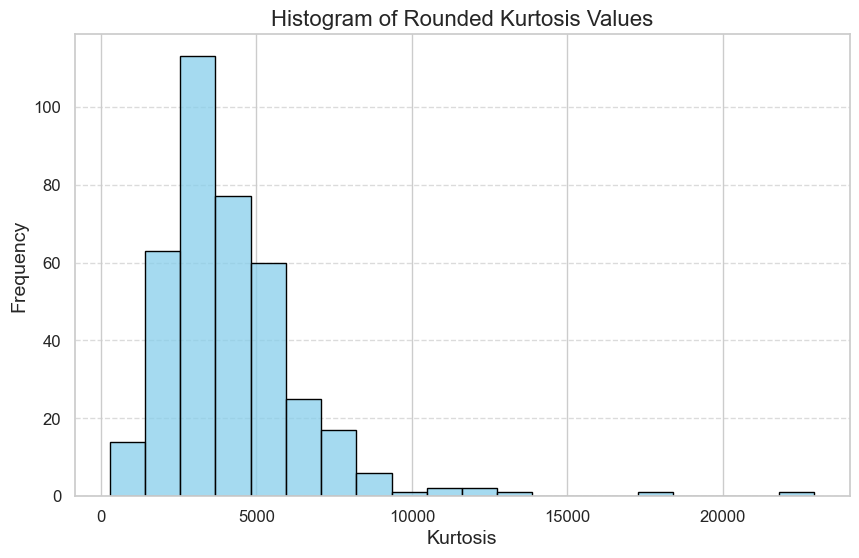

In [79]:
# Calculate kurtosis for each column in your DataFrame
kurtosis_valuesT = mergedT.kurtosis()

# Round the kurtosis values
rounded_kurtosisT_values = np.round(kurtosis_valuesT, decimals=2)

# Set seaborn style
sns.set(style="whitegrid")

# Plot a histogram of rounded kurtosis values
plt.figure(figsize=(10, 6))
sns.histplot(rounded_kurtosisT_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Rounded Kurtosis Values', fontsize=16)
plt.xlabel('Kurtosis', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [80]:
# Test normality using the Kolmogorov-Smirnov test impl. before
non_normal_countT = test_distribution_per_feature(mergedT)

All features have non-normal distribution


In [81]:
# Now test other distribition in the same way
test_poissondistribution_per_feature(mergedT)

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_stats_py.py:8064: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_stats_py.py:8064: RuntimeWarning: overflow encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


KeyboardInterrupt: 

In [65]:
test_negative_binomial_distribution_per_feature(mergedT)

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_stats_py.py:7985: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_stats_py.py:7985: RuntimeWarning: overflow encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


Number of features with Negative Binomial distribution: 5
Some features might have Negative Binomial distribution


['output.STAR.1_D8_Hypo_S170_Aligned.sortedByCoord.out.bam',
 'output.STAR.1_E1_Norm_S193_Aligned.sortedByCoord.out.bam',
 'output.STAR.1_F10_Hypo_S268_Aligned.sortedByCoord.out.bam',
 'output.STAR.2_D8_Hypo_S176_Aligned.sortedByCoord.out.bam',
 'output.STAR.3_E7_Hypo_S229_Aligned.sortedByCoord.out.bam']

________________________________________________________________________________________________________________________

## Transformations 

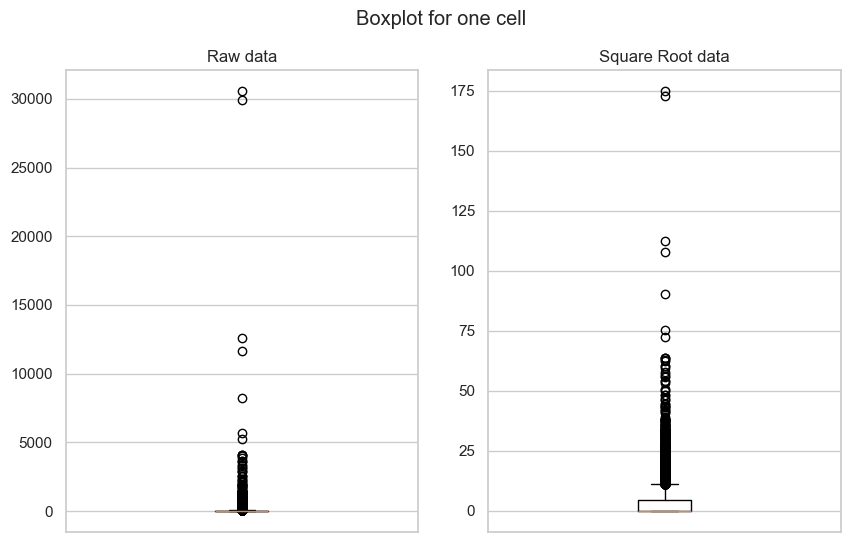

In [82]:
# Highly non normal distribution hence we take concave transformations the features
# Inspect first a single randomly selected feature

# we are using the transposed dataset

# Select a random index with seed
np.random.seed(42)
randomindex = np.random.randint(0, mergedT.shape[1])

# Apply the square root of the feature with random index
mergedT_squareroot = np.sqrt(mergedT[mergedT.columns[randomindex]])
# Boxplot of the feature and the transformed feature
fig, axs = plt.subplots(1, 2, figsize=(10,6))
plt.suptitle("Boxplot for one cell")
axs[0].boxplot(mergedT[mergedT.columns[randomindex]]+1)
axs[0].set_title("Raw data")
axs[0].get_xaxis().set_visible(False)
axs[0].grid(True)
axs[1].boxplot(mergedT_squareroot)
axs[1].set_title("Square Root data")
axs[1].get_xaxis().set_visible(False)
axs[1].grid(True)

plt.show()

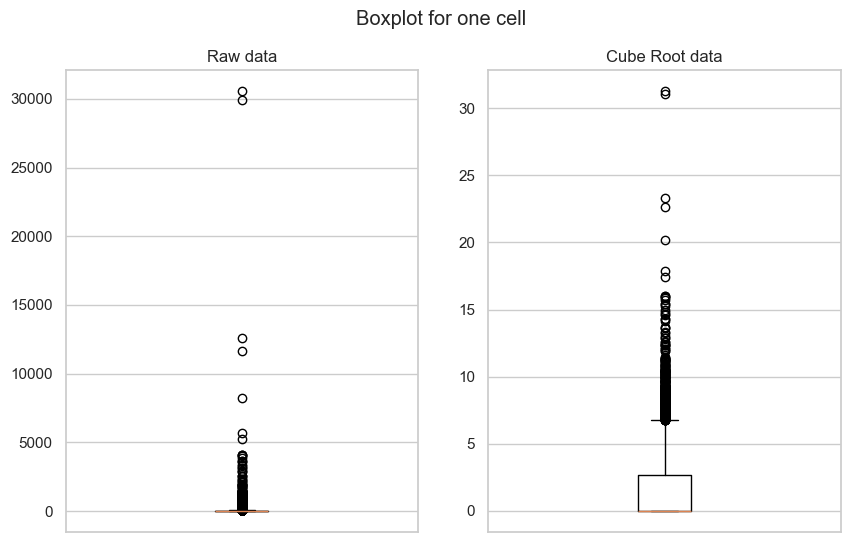

In [84]:
mergedT_cuberoot = np.cbrt(mergedT[mergedT.columns[randomindex]])
# Boxplot of the feature and the transformed feature
fig, axs = plt.subplots(1, 2, figsize=(10,6))
plt.suptitle("Boxplot for one cell")
axs[0].boxplot(mergedT[mergedT.columns[randomindex]]+1)
axs[0].set_title("Raw data")
axs[0].get_xaxis().set_visible(False)
axs[0].grid(True)
axs[1].boxplot(mergedT_cuberoot)
axs[1].set_title("Cube Root data")
axs[1].get_xaxis().set_visible(False)
axs[1].grid(True)

plt.show()

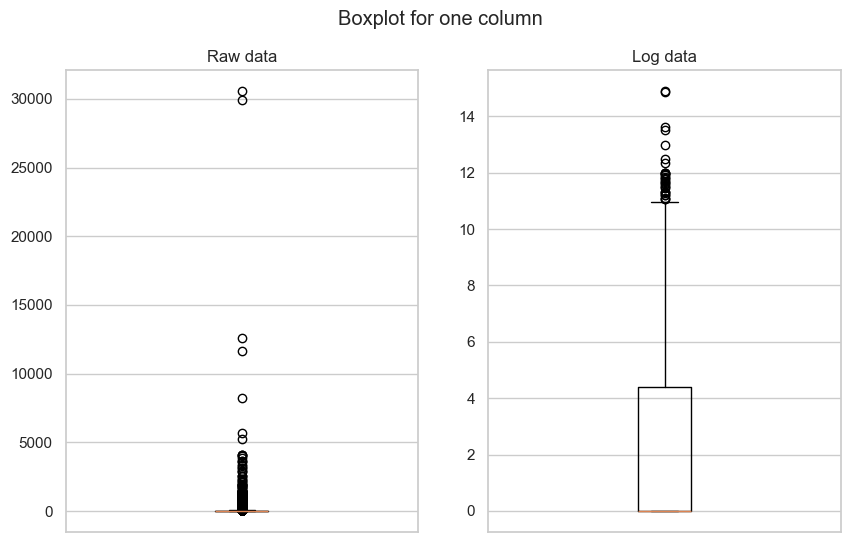

In [85]:
mergedT_log2_onecol = np.log2(mergedT[mergedT.columns[randomindex]]+1)
# Boxplot of the feature and the transformed feature
fig, axs = plt.subplots(1, 2, figsize=(10,6))
plt.suptitle("Boxplot for one column")
axs[0].boxplot(mergedT[mergedT.columns[randomindex]]+1)
axs[0].set_title("Raw data")
axs[0].get_xaxis().set_visible(False)
axs[0].grid(True)
axs[1].boxplot(mergedT_log2_onecol)
axs[1].set_title("Log data")
axs[1].get_xaxis().set_visible(False)
axs[1].grid(True)

plt.show()

In [5]:
# Prove that log transformation is the best
# Calculate the skewness of the raw data
skewness_raw = mergedT[mergedT.columns[randomindex]].skew()
# Calculate the skewness of the log transformed data
skewness_log = np.log2(mergedT[mergedT.columns[randomindex]]+1).skew()
# Calculate the skewness of the square root transformed data
skewness_sqrt = np.sqrt(mergedT[mergedT.columns[randomindex]]).skew()
# Calculate the skewness of the cube root transformed data
skewness_cbrt = np.cbrt(mergedT[mergedT.columns[randomindex]]).skew()
# Print the skewness values
print(f"Skewness of raw data: {skewness_raw}")
print(f"Skewness of log transformed data: {skewness_log}")
print(f"Skewness of square root transformed data: {skewness_sqrt}")
print(f"Skewness of cube root transformed data: {skewness_cbrt}")

# Plot the histogram of transformed column, inspect why the skewness is negative
fig, axs = plt.subplots(1, 2, figsize=(10,6))
plt.suptitle("Histogram for one column")
axs[0].hist(mergedT[mergedT.columns[randomindex]], bins = 100)
# Set x-axis limit
axs[0].set_xlim(0, 1000)
axs[0].set_title("Raw data")
axs[0].grid(True)
axs[1].hist(mergedT_log2_onecol)
axs[1].set_title("Log data")
axs[1].grid(True)

# Plot the density of the transformed column
fig, axs = plt.subplots(1, 2, figsize=(10,6))
plt.suptitle("Density plot for one column")
sns.kdeplot(mergedT[mergedT.columns[randomindex]], ax=axs[0])
axs[0].set_title("Raw data")
axs[0].grid(True)
sns.kdeplot(mergedT_log2_onecol, ax=axs[1])
axs[1].set_title("Log data")
axs[1].grid(True)


NameError: name 'mergedT' is not defined

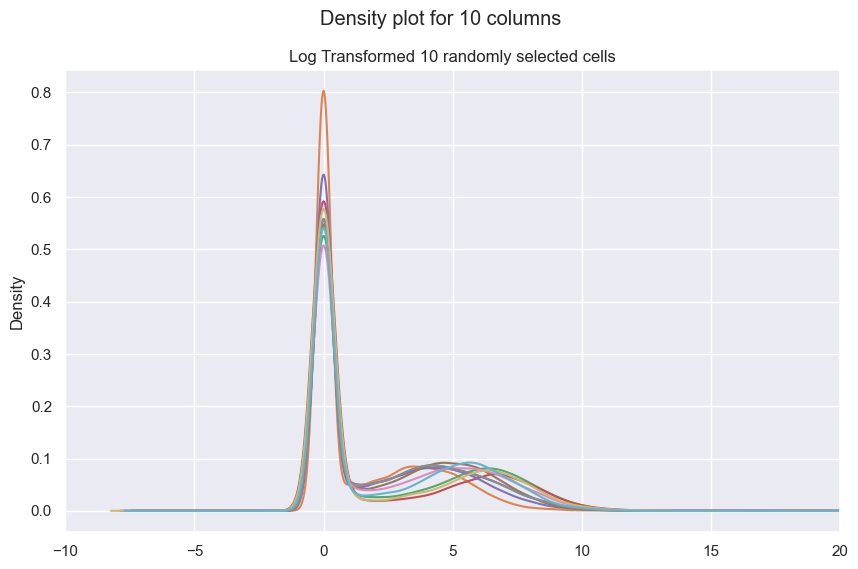

In [10]:
# Plot the densities of 10 randomly selected features all in one plot with sns with rescaled x axis
np.random.seed(42)
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plt.suptitle("Density plot for 10 columns")
for i in np.random.randint(0, mergedT.shape[1], 10):
    np.log2(mergedT[mergedT.columns[i]]+1).plot.density(legend = False)
ax.set_title("Log Transformed 10 randomly selected cells")
# Rescale x limits
ax.set_xlim(-10, 20)
plt.grid(True)
ax.grid(True)
plt.show()


Skewness of log transformed data: 2.4853469964955677
Skewness of cube root transformed data: 3.315358857587284
Skewness of square root transformed data: 8.395258532767699


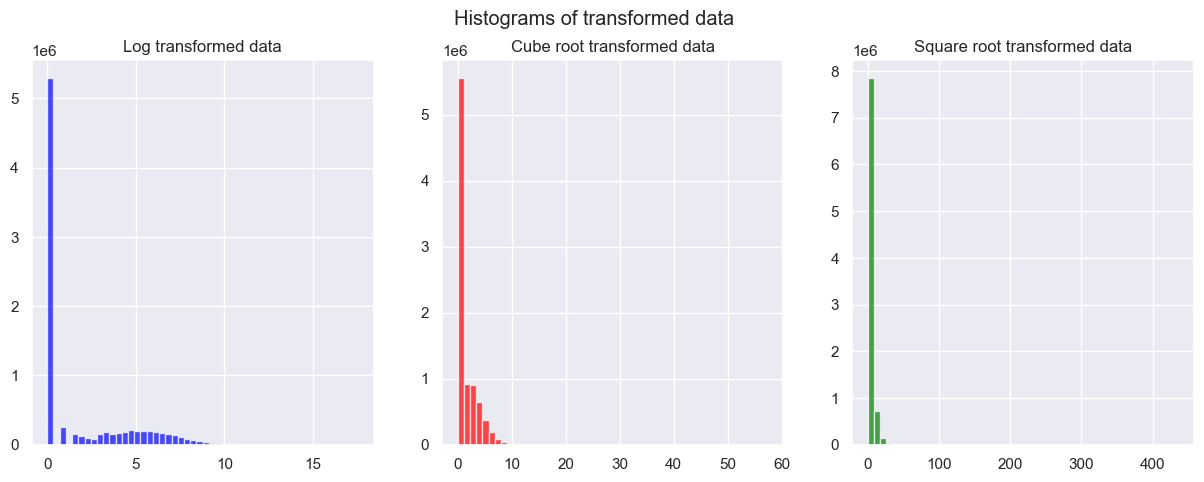

In [11]:
# Apply the log transformation to the entire dataset
mergedT_log = np.log2(mergedT+1)
mergedT_cbrt = np.cbrt(mergedT)
mergedT_sqrt = np.sqrt(mergedT)
# Convert to DataFrame
mergedT_log = pd.DataFrame(mergedT_log, columns=mergedT.columns, index=mergedT.index)
mergedT_cbrt = pd.DataFrame(mergedT_cbrt, columns=mergedT.columns, index=mergedT.index)
mergedT_sqrt = pd.DataFrame(mergedT_sqrt, columns=mergedT.columns, index=mergedT.index)
# Check skewness of the transformed data
skewness_log = mergedT_log.skew()
skewness_cbrt = mergedT_cbrt.skew()
skewness_sqrt = mergedT_sqrt.skew()
# Print the skewness values
print(f"Skewness of log transformed data: {skewness_log.mean()}")
print(f"Skewness of cube root transformed data: {skewness_cbrt.mean()}")
print(f"Skewness of square root transformed data: {skewness_sqrt.mean()}")
# Plot the histograms of the transformed data
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle("Histograms of transformed data")
axs[0].hist(mergedT_log.values.flatten(), bins=50, color='blue', alpha=0.7)
axs[0].set_title("Log transformed data")
axs[1].hist(mergedT_cbrt.values.flatten(), bins=50, color='red', alpha=0.7)
axs[1].set_title("Cube root transformed data")
axs[2].hist(mergedT_sqrt.values.flatten(), bins=50, color='green', alpha=0.7)
axs[2].set_title("Square root transformed data")
plt.show()

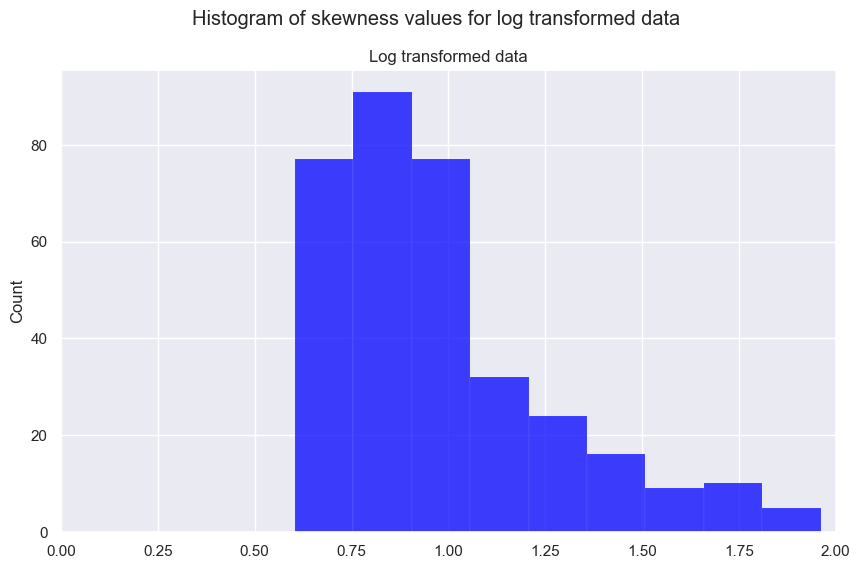

In [12]:
# Create a list of skewness values for all columns
skewness_log = mergedT_log.skew()

# Now we histogram plot the skewness values for the log transformed data
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plt.suptitle("Histogram of skewness values for log transformed data")
sns.histplot(skewness_log, bins=1000, color='blue')
ax.set_title("Log transformed data")
# Set x limits
ax.set_xlim(0, 2)
plt.grid(True)
plt.show()

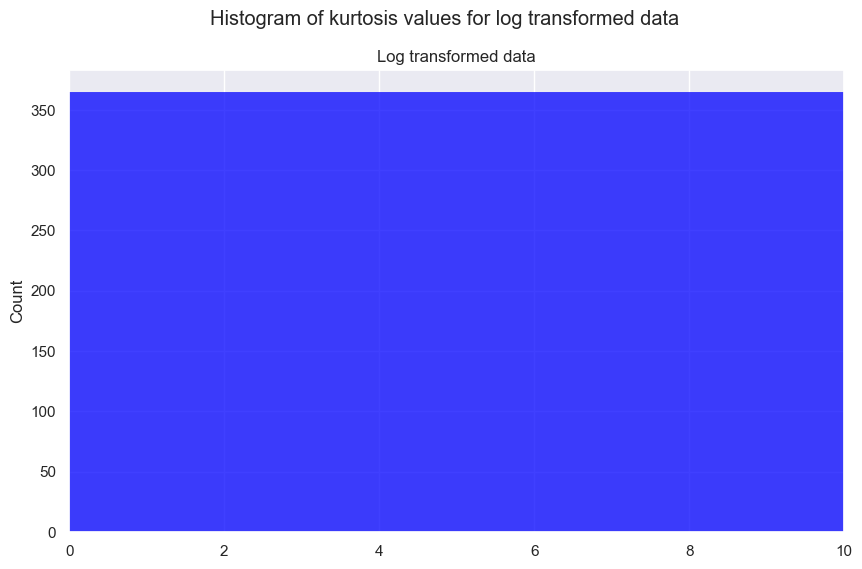

In [14]:
# kurtosis of log-trasnformed dataframe computed one column at a time
kurtosis_log = mergedT_log.kurtosis()
# Plot the histogram of kurtosis values
fig = plt.figure(figsize=(10,6))
plt.suptitle("Histogram of kurtosis values for log transformed data")
sns.histplot(kurtosis_log, bins=1000, color='blue')
plt.title("Log transformed data")
plt.xlim(0, 10)
plt.grid(True)
plt.show()

## Normalization 

We use CPM (Counts Per Million) normalization, which is a common normalization technique for RNA-seq data. It is calculated as follows:
CPM values are calculated by dividing the number of reads mapped to a gene by a million scaling factor divided by the total of mapped reads.

We will do it across columns (i.e. across cells) because we want the genes' reads to be "normalized" and so comparable across different observations.

In [15]:
mergedT_cpm = pd.DataFrame()
for column in mergedT.columns:
    # Calculate the CPM
    cpm = mergedT[column] / mergedT[column].sum() * 1e6
    # Add the CPM to the new DataFrame
    mergedT_cpm = pd.concat([mergedT_cpm, cpm], axis=1)


In [16]:
mergedT_cpm.shape

(22934, 383)

In [17]:
mergedT_cpm.head()

,output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam,output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam,output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam,output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam,output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam,...,output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam,output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam,output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam,output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam,output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam,output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam
WASH7P,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,1.332,0.0,0.0,0.000000,0.708473,0.000000,0.693754
MIR6859-1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
WASH9P,1.068248,0.0,0.0,0.0,0.0,0.775673,5.783158,0.694678,0.0,0.0,...,2.511345,1.036196,0.000000,0.000,0.0,0.0,0.885478,0.708473,2.554037,3.468768
OR4F29,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.638509,0.000000
MTND1P23,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,1.256856,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [77]:
mergedT_cpm.describe()

,output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam,output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam,output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam,output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam,output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam,...,output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam,output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam,output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam,output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam,output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam,output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam
count,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,...,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000,22934.000000
mean,43.603384,43.603384,43.603384,43.603384,43.603384,43.603384,43.603384,43.603384,43.603384,43.603384,...,43.603384,43.603384,43.603384,43.603384,43.603384,43.603384,43.603384,43.603384,43.603384,43.603384
std,497.493825,739.236938,522.869294,259.473263,371.481087,390.628275,248.948488,361.349188,297.403028,495.234979,...,485.075722,266.070064,854.613050,399.987548,304.217738,495.504908,318.185301,383.175584,406.661494,545.061613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.694678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.160220,0.000000,2.522106,0.000000,21.004495,17.840480,22.554317,24.313745,24.584697,19.459417,...,22.602105,31.085892,0.000000,22.643992,23.791539,22.502532,23.907896,21.254181,24.263352,22.893868
max,49934.195908,49822.064057,41386.250486,12298.395676,31752.795098,36344.935592,17079.979343,35409.148220,23443.449052,33217.225476,...,44701.941019,24200.367228,103001.875229,39347.266937,24086.950143,48217.924517,24811.968824,28840.506501,29538.076861,47723.308872


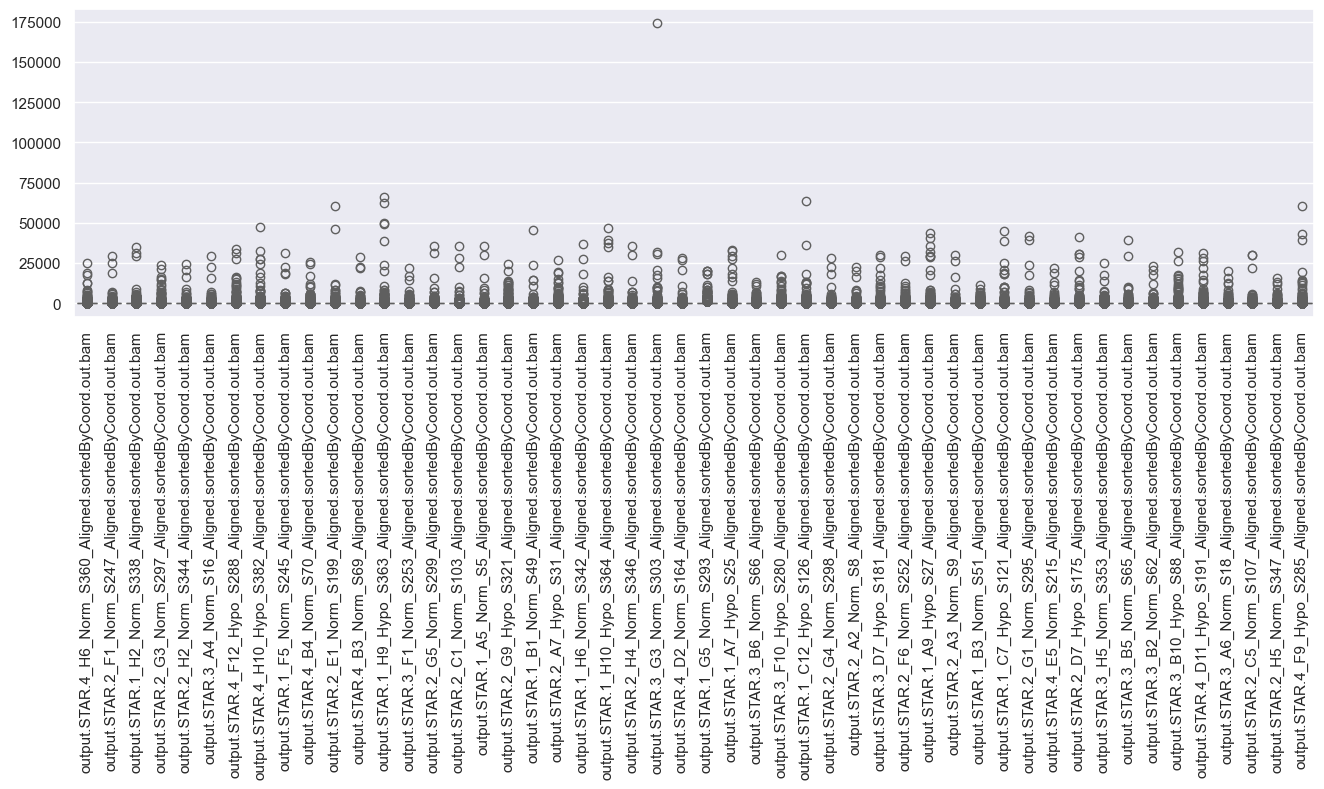

In [18]:
#box-plot of log-transformed 50 random columns of dataframe
random_columns = list(range(0, mergedT.shape[1])) # list of integers from 1 to 243
random.shuffle(random_columns)
random_columns = random_columns[:50]
normalized_small = mergedT_cpm.iloc[:, random_columns]
plt.figure(figsize=(16,4))
plot=sns.boxplot(data=normalized_small,palette="Set3")
plt.setp(plot.get_xticklabels(), rotation=90);

Mean Skewness of CPM normalized data: 55.60321714622331
Mean Kurtosis of CPM normalized data: 4165.763054333273


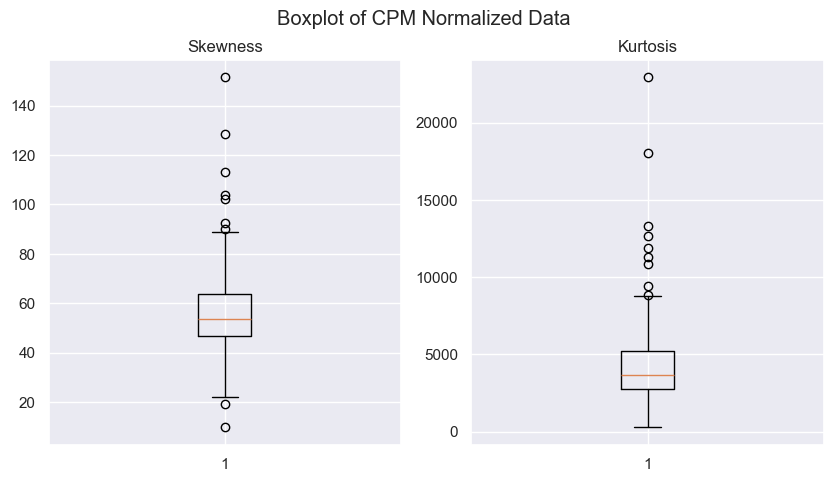

In [19]:
# Check again skewness and kurtosis of the CPM normalized data
skewness_cpm = mergedT_cpm.skew()
kurtosis_cpm = mergedT_cpm.kurtosis()
# Print the skewness and kurtosis values
print(f"Mean Skewness of CPM normalized data: {skewness_cpm.mean()}")
print(f"Mean Kurtosis of CPM normalized data: {kurtosis_cpm.mean()}")
# boxplot of skewness
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plt.suptitle("Boxplot of CPM Normalized Data")
ax[0].boxplot(skewness_cpm)
ax[0].grid(True)
ax[0].set_title("Skewness")
ax[1].boxplot(kurtosis_cpm)
ax[1].grid(True)
ax[1].set_title("Kurtosis")
plt.show()


In [20]:
# Now we will apply the log transformation to the CPM normalized data
mergedT_cpm_log = np.log2(mergedT_cpm+1)
# Convert to DataFrame
mergedT_cpm_log = pd.DataFrame(mergedT_cpm_log, columns=mergedT_cpm.columns, index=mergedT_cpm.index)

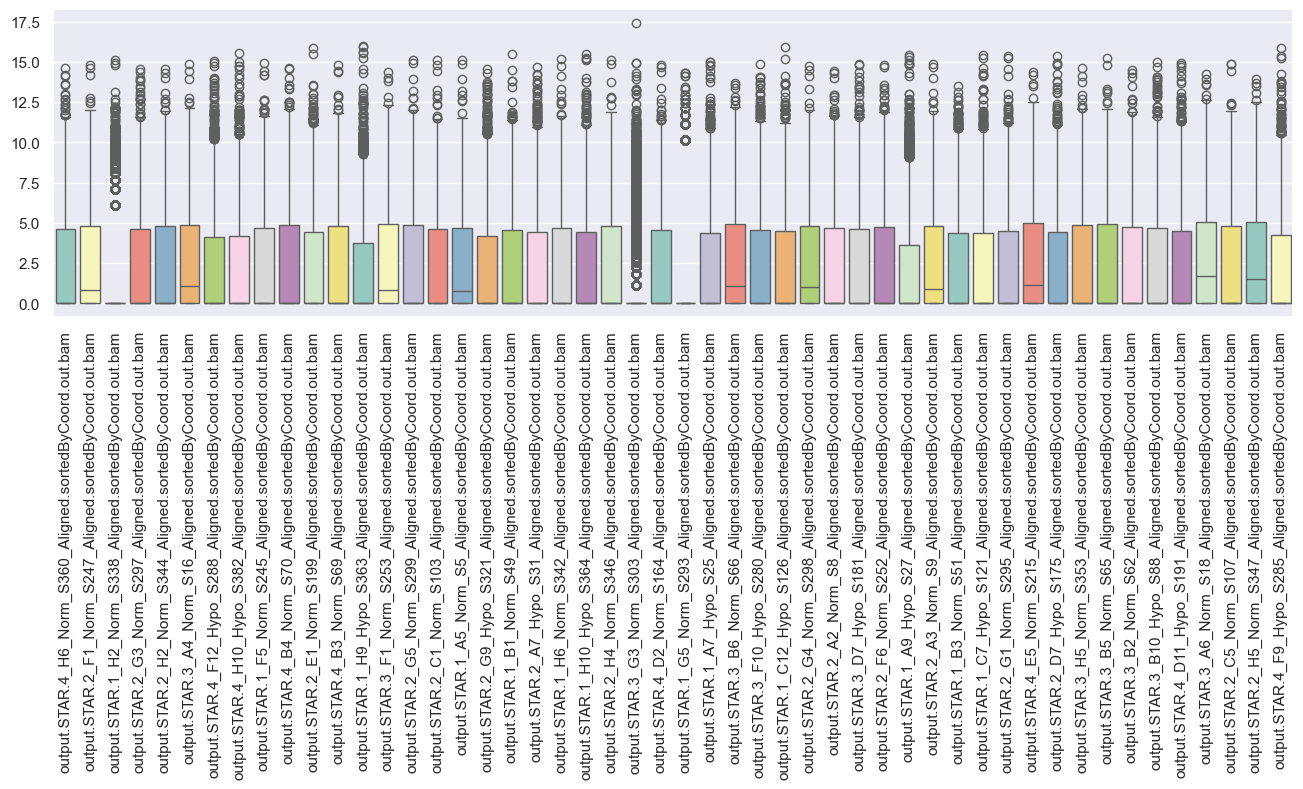

In [21]:
# Study the distributions of 10 random columns now (boxplot and densities)
log_small = mergedT_cpm_log.iloc[:, random_columns]
plt.figure(figsize=(16,4))
plot=sns.boxplot(data=log_small, palette="Set3")
plt.setp(plot.get_xticklabels(), rotation=90);

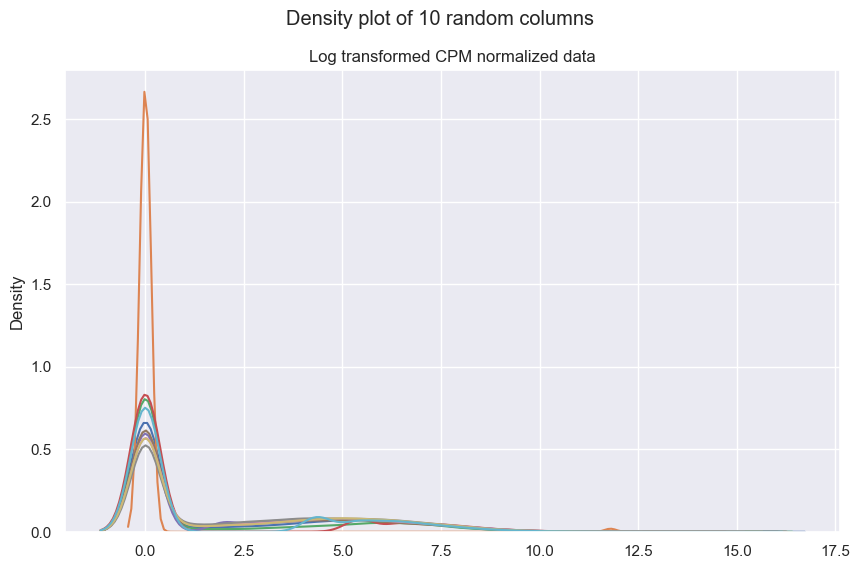

In [22]:
# Densities of the 10 random columns
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plt.suptitle("Density plot of 10 random columns")
for i in range(10):
    sns.kdeplot(mergedT_cpm_log.iloc[:, i], ax=ax)
ax.set_title("Log transformed CPM normalized data")
ax.set_xlabel("")
ax.grid(True)
plt.show()

___________________________________________________________________________________________________________________

## Filtering  

In [23]:
def filter_CPM(data, threshold):
    data_filtered = pd.DataFrame()
    # Keep track of the number of rows removed
    removed_genes = 0
    # Create a mask to filter out rows with low counts
    if 'Target' in data.index:
        data = data.drop('Target')
    mask_thr = data > threshold
    mask_rows = mask_thr.sum(axis=1) >= 2
    data_filtered = data.loc[mask_rows, :]
    return data_filtered

In [24]:
filteredcpm = filter_CPM(mergedT_cpm_log, 0.5)
print(filteredcpm)
print("Number of rows before filtering:", mergedT_cpm_log.shape[0])
print("Number of rows after filtering:", filteredcpm.shape[0])
print("Number of rows removed:", mergedT_cpm_log.shape[0] - filteredcpm.shape[0])

           output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam  \
WASH7P                                              0.000000          
MIR6859-1                                           0.000000          
WASH9P                                              1.048409          
OR4F29                                              0.000000          
MTND1P23                                            0.000000          
...                                                      ...          
MT-TE                                               2.398622          
MT-CYB                                              8.177056          
MT-TT                                               0.000000          
MT-TP                                               2.664765          
MAFIP                                               3.254894          

           output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam  \
WASH7P                                              0.000000          
MIR68

In [ ]:
# Grid search on filter_CPM for the best threshold
thresholds = np.linspace(start = 0, stop = 20, num = 40)
n_rows = [] # rows are genes
for threshold in thresholds:
    filtered = filter_CPM(mergedT_cpm_log, threshold)
    n_rows.append(filtered.shape[0])
# Plot the number of rows vs the threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, n_rows, marker='o', color='blue')
plt.title("Number of genes vs threshold")
plt.xlabel("Threshold")
plt.ylabel("Number of genes")
plt.grid(True)
plt.show()

In [ ]:
#we compute the percentege of genes that are removed for 1.5 threshold
filtered = filter_CPM(mergedT_cpm_log, 1.5)
percentage = (mergedT_cpm_log.shape[0] - filtered.shape[0]) / mergedT_cpm_log.shape[0] * 100
print(f"Percentage of genes removed for threshold 1.5: {percentage:.2f}%")
print(f"Number of remaining genes: {filtered.shape[0]}")

In [ ]:
# Now scatter plot the variance of the genes
filt_first = filter_CPM(mergedT_cpm_log, 1.5).T
adata = sc.AnnData(filt_first)

sc.pp.highly_variable_genes(adata, n_top_genes=3000, flavor='seurat_v3')
# Note since our dataset is already log-transformed as the function 'Expects logarithmized data'
sc.pl.highly_variable_genes(adata)

In [ ]:
adata = adata[:, adata.var['highly_variable']]
print("Total matching: ", adata.var['highly_variable'].index.isin(df_seq_MFiltNorm.index).astype(bool).sum())
print("Percentage matching to the given training dataset: ", round(adata.var['highly_variable'].index.isin(df_seq_MFiltNorm.index).astype(bool).sum()/3000*100, 2), "%")

## DIMENSIONALITY REDUCTION FOR VISUALIZATION 


PCA

In [ ]:
df_seq_MFiltNorm.T.head()


In [51]:
df_dim_red = pd.DataFrame(StandardScaler().fit_transform(df_seq_MFiltNorm.T), columns=df_seq_MFiltNorm.T.columns, index=df_seq_MFiltNorm.T.index)
df_dim_red.T.head()

In [52]:
merged_df_pca = pd.merge(df_dim_red, df_metaM['Condition'], left_index=True, right_index=True)
merged_df_pca

,CYP1B1,CYP1B1-AS1,CYP1A1,NDRG1,DDIT4,PFKFB3,HK2,AREG,MYBL2,ADM,...,DNAI7,MAFG,LZTR1,BCO2,GRIK5,SLC25A27,DENND5A,CDK5R1,FAM13A-AS1,Condition
output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam,-0.618399,-0.614660,-0.284194,-0.792463,-0.615162,-0.674972,-0.473586,-0.522142,0.143860,-0.390037,...,-0.096155,-0.486908,0.982111,-0.146949,-0.128153,-0.13728,-0.126312,-0.324213,-0.275483,Norm
output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam,-0.644047,-0.638161,-0.284194,-0.791156,-0.643563,-0.690648,-0.473586,0.924384,2.114986,-0.390037,...,-0.096155,-0.716825,0.046558,-0.146949,-0.128153,-0.13728,-0.351490,-0.324213,-0.275483,Norm
output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam,-0.605212,-0.596382,-0.284194,-0.792463,-0.728181,-0.710599,-0.473586,-0.522142,0.674821,-0.390037,...,-0.096155,-0.400689,-0.641350,-0.146949,-0.128153,-0.13728,-0.801848,-0.324213,-0.275483,Norm
output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam,-0.656629,-0.653247,-0.284194,-0.792463,-0.643856,-0.608944,-0.465405,-0.113194,1.413550,-0.390037,...,-0.096155,-0.688086,-0.366187,-0.146949,-0.128153,-0.13728,-0.748864,-0.324213,-0.275483,Norm
output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam,0.043851,0.119077,-0.284194,0.062233,-0.000878,0.050866,-0.065672,0.214640,-0.701415,-0.390037,...,-0.096155,0.174105,-0.641350,-0.146949,-0.128153,-0.13728,-0.007100,-0.324213,-0.275483,Hypo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,-0.636183,-0.625685,-0.284017,-0.474892,-0.650297,-0.578542,-0.431049,-0.520452,-0.348033,-0.390037,...,-0.096155,-0.716825,-0.641350,-0.146949,-0.128153,-0.13728,-0.205787,1.829650,-0.275483,Norm
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,-0.598921,-0.586228,-0.284194,-0.711437,-0.606085,-0.267876,-0.323617,-0.522142,-0.642814,-0.390037,...,-0.096155,-0.731195,-0.641350,-0.146949,-0.128153,-0.13728,-0.801848,-0.324213,-0.275483,Norm
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,3.521815,3.324428,1.712593,0.858121,0.517954,1.979466,-0.091303,-0.522142,-0.701415,-0.390037,...,-0.096155,-0.084552,-0.641350,-0.146949,-0.128153,-0.13728,1.052564,-0.324213,1.205609,Hypo
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,1.762629,1.617886,-0.184479,0.416397,2.999975,0.328280,0.148646,-0.522142,-0.665900,-0.217488,...,-0.096155,0.087886,-0.421219,-0.146949,-0.128153,-0.13728,-0.709127,-0.324213,0.233642,Hypo


The number of dimensions needed to explain 95% of the variance is 204


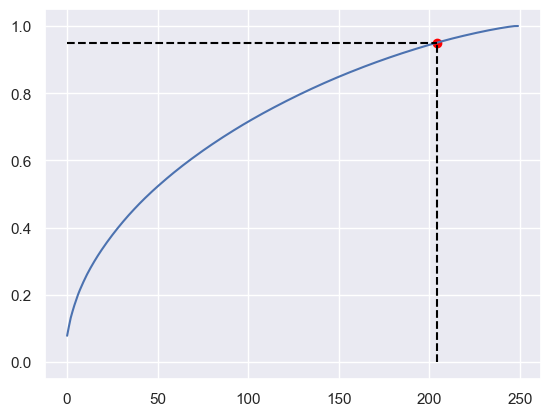

In [55]:
pca = PCA()
pca_array = pca.fit_transform(df_dim_red)
pca_array_df = pd.DataFrame(pca_array, columns=[f'PC{i+1}' for i in range(pca_array.shape[1])], index=df_dim_red.index)
merged_pca_array_df = pd.merge(pca_array_df, df_metaH['Condition'], left_index=True, right_index=True)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
nec_dimensions = np.argmax(cumsum >= 0.95)
plt.scatter(nec_dimensions, 0.95, color='red')
plt.plot([nec_dimensions, nec_dimensions], [0, 0.95], linestyle='--', color='black')
plt.plot([0, nec_dimensions], [0.95, 0.95], linestyle='--', color='black')
print(f"The number of dimensions needed to explain 95% of the variance is {nec_dimensions}")

In [56]:
# we now use pca to visualize the data
three_dim_df = merged_pca_array_df[['PC1', 'PC2', 'PC3', 'Condition']]
three_dim_df.head()

,PC1,PC2,PC3,Condition
output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam,-11.733153,-8.942211,-2.254930,Norm
output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam,-17.064252,4.697082,4.419943,Norm
output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam,-21.459996,-2.427312,5.204875,Norm
output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam,-12.774610,2.729664,5.724528,Norm
output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam,7.078282,9.258913,-2.543533,Hypo


In [58]:
import plotly.express as px

fig = px.scatter_3d(
    data_frame = three_dim_df,
    x = "PC1",
    y = "PC2",
    z = "PC3",
    title="3-dimensional representation of the data with UMAP",
    color = "Condition"
)
# Show the fig
fig.show()

In [59]:
import umap.umap_ as umap

n_neighbors_list = [2, 10, 50, df_dim_red.shape[0]-1]

umap_dict = {}
for n in n_neighbors_list:
    reducer = umap.UMAP(n_components=3, n_neighbors=n)
    embedding = reducer.fit_transform(df_dim_red)
    columns = [f'UMAP{i+1}' for i in range(embedding.shape[1])]
    umap_embedding_df = pd.DataFrame(embedding, columns=columns, index=df_dim_red.index)
    merged_umap = pd.merge(umap_embedding_df, df_metaM['Condition'], left_index=True, right_index=True)
    merged_umap['n_neighbors'] = [n]*df_dim_red.shape[0]
    umap_dict[n] = merged_umap
    
    fig = px.scatter_3d(
    data_frame = merged_umap,
    x = "UMAP1",
    y = "UMAP2",
    z = "UMAP3",
    title=f"3-dimensional representation of the data with UMAP, n_neighbors = {n}",
    color = "Condition"
    )
    fig.show()

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

